In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import sklearn; sklearn.__version__ #my version: '0.18.1'

'0.18.1'

In [3]:
import matplotlib as mpl; mpl.__version__ #my version: '2.0.2'

'2.0.2'

In [6]:
import numpy as np; np.version.version #my version '1.13.1'

'1.13.1'

In [9]:
import pandas as pd; pd.__version__ #my version '0.20.3'

'0.20.3'

In [35]:
from sklearn.model_selection import train_test_split

In [4]:
fruits=pd.read_table("fruit_data_with_colors.txt")

In [5]:
fruits.head()

fruit_label fruit_name fruit_subtype  mass  width  height  color_score
0            1      apple  granny_smith   192    8.4     7.3         0.55
1            1      apple  granny_smith   180    8.0     6.8         0.59
2            1      apple  granny_smith   176    7.4     7.2         0.60
3            2   mandarin      mandarin    86    6.2     4.7         0.80
4            2   mandarin      mandarin    84    6.0     4.6         0.79

In [6]:
fruits.shape

(59, 7)

### Splitting data (train-test split)

In [40]:
X,y=np.random.randint(1,1000, (100,7)), np.random.randint(0,2,100)

In [41]:
# get a random split of features and labels using train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, train_size=0.75, 
                                                  random_state=42, #set seed for random number generator
                                                 ) #75-25 split
#or
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=42) #75-25 split
# use both test_size and train_size to utilize only a part of the data
X_train, X_test, y_train, y_test=train_test_split(X,y, train_size=0.5, test_size=0.3, random_state=42) #50-20

### 3D plot

In [3]:
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


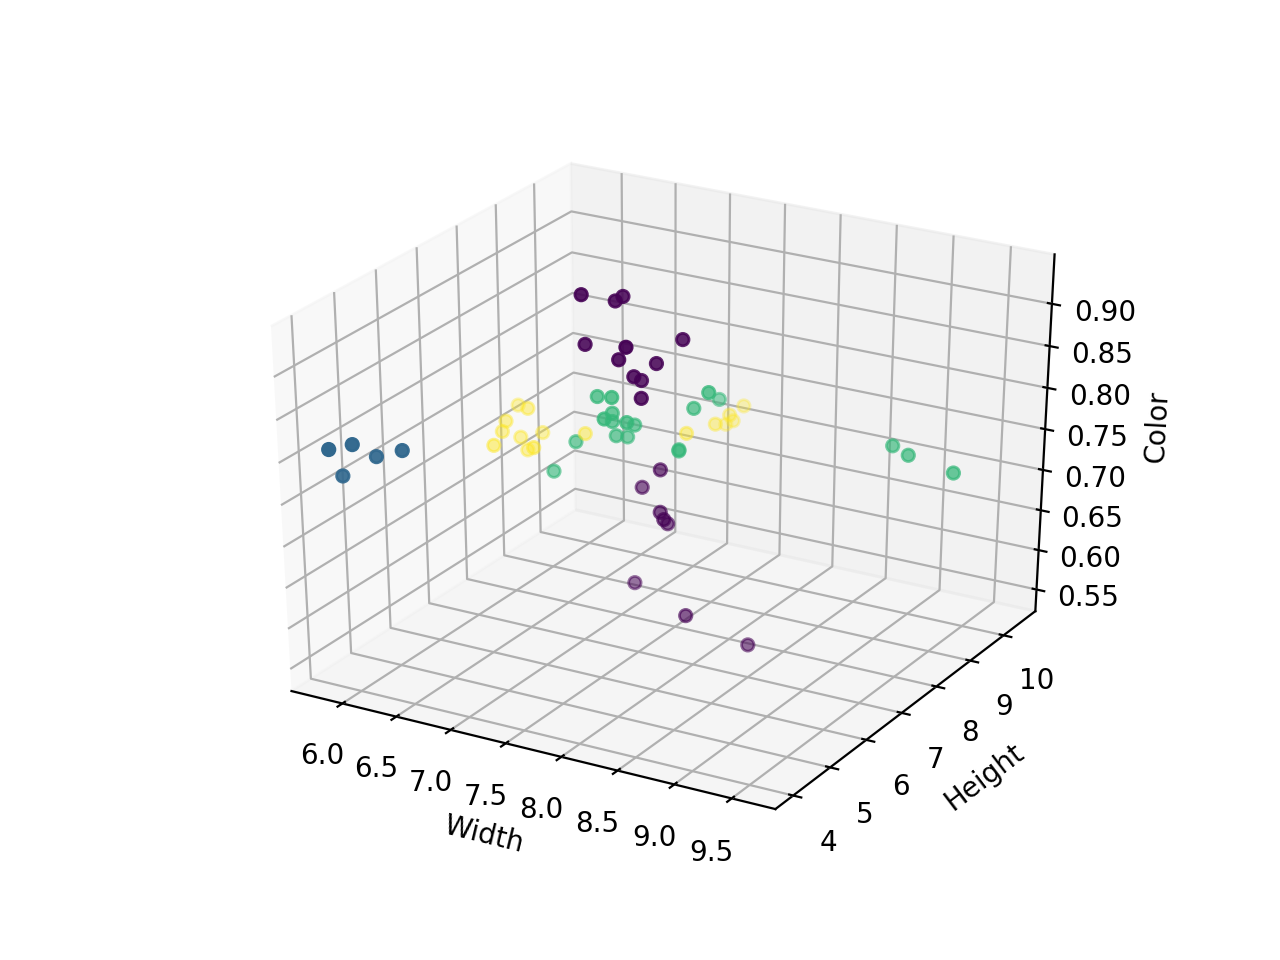

In [182]:
f=plt.figure()
axs=f.add_subplot(1,1,1, projection="3d")
axs.scatter(fruits["width"], fruits["height"], fruits["color_score"], c=fruits["fruit_label"], marker='o',  s=20)
axs.set_xlabel("Width")
axs.set_ylabel("Height")
axs.set_zlabel("Color")

### K-Nearest neighbours algorithm (KNN)

In [12]:
fruits.head()

fruit_label fruit_name fruit_subtype  mass  width  height  color_score
0            1      apple  granny_smith   192    8.4     7.3         0.55
1            1      apple  granny_smith   180    8.0     6.8         0.59
2            1      apple  granny_smith   176    7.4     7.2         0.60
3            2   mandarin      mandarin    86    6.2     4.7         0.80
4            2   mandarin      mandarin    84    6.0     4.6         0.79

In [33]:
X=fruits[["width", "height", "mass"]]
y=fruits["fruit_label"]
X_train, X_test, y_train, y_test=train_test_split(X,y, train_size=0.25, random_state=0)

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
KNeighborsClassifier

In [19]:
### KNN requires 1. number of neighbors (n_neighbors),
#                2. distance metric to use (metric)
#                3. weights for neighbors (weights)
#                4. aggregation function for metrics

In [34]:
knn=KNeighborsClassifier(n_neighbors=5, weights="uniform", metric="minkowski", p=2)
#minkowski, p=2 is Euclidean distance, and p=1 is Manhattan distance
#algorithm={"auto", "ball_tree", "kd_tree", "brute"} 
#metric -> Euclidean (default)
# weights -> "uniform" (default)

# or
knn=KNeighborsClassifier(n_neighbors=5)

In [35]:
knn.fit(X_train, y_train) #state is updated

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [36]:
#evaluate model on validation data
knn.score(X_test, y_test)

0.42222222222222222

In [48]:
mapping=dict(zip(fruits["fruit_label"], fruits["fruit_name"]))

In [83]:
#predict for individual values
idx=np.random.choice(X_test.index)
pred=knn.predict(X_test.loc[idx])
print("Actual:", fruits.loc[idx,"fruit_name"])
print("Predicted:", mapping[pred[0]])

Actual: lemon
Predicted: lemon


/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


[0.68888888888888888, 0.57777777777777772, 0.62222222222222223, 0.53333333333333333, 0.42222222222222222, 0.37777777777777777, 0.37777777777777777, 0.31111111111111112, 0.31111111111111112, 0.31111111111111112, 0.31111111111111112, 0.31111111111111112, 0.31111111111111112]


<IPython.core.display.Javascript object>


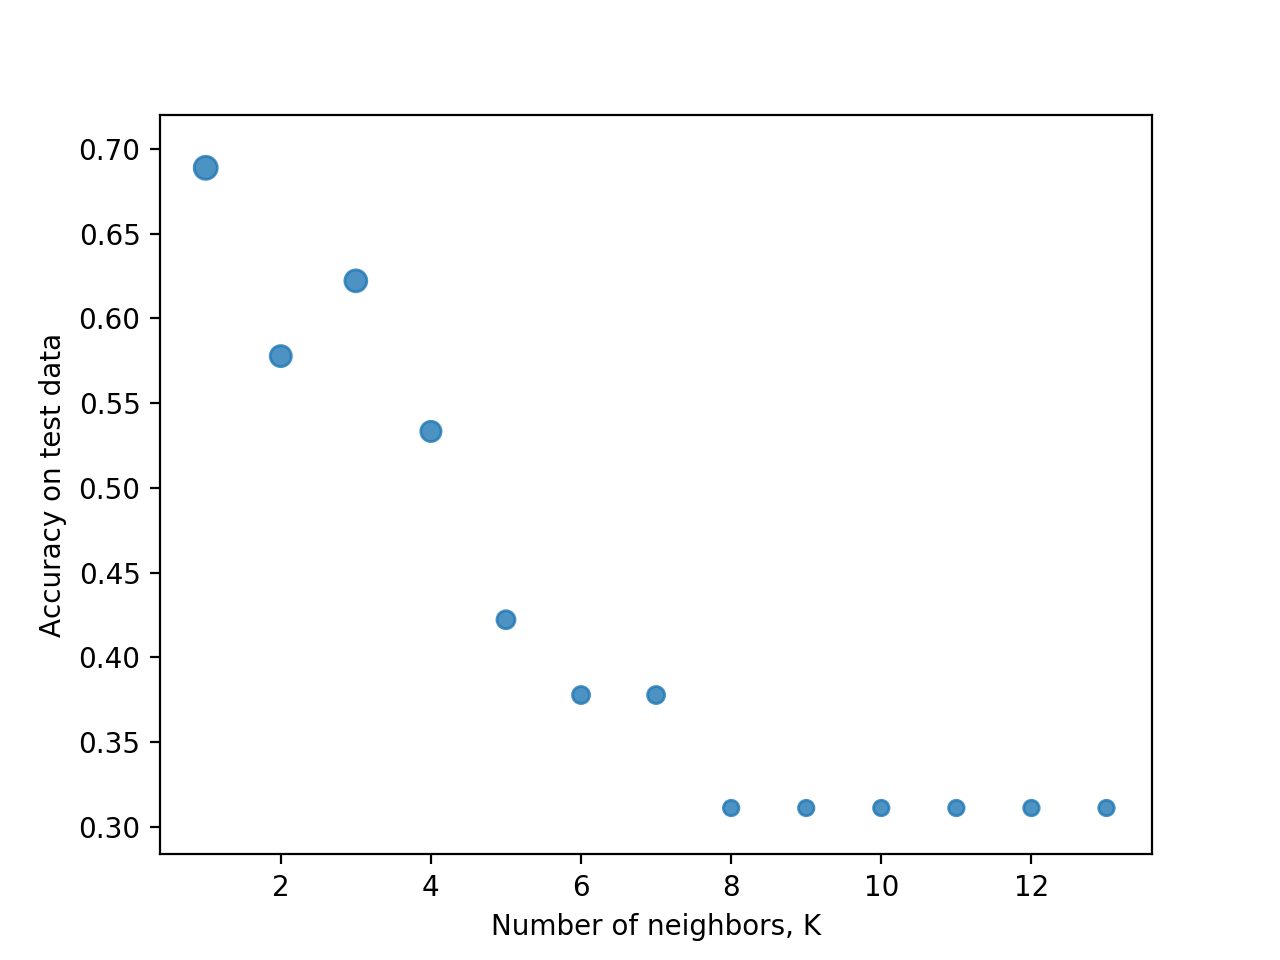

In [93]:
# Test accuracy as function of number of neighbors (K)
ks=np.arange(1,len(X_train))
accs=list()
for k in ks:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc=knn.score(X_test, y_test)
    accs.append(acc)
print(accs)
f=plt.figure()
axs=plt.gca()
sizes=[acc*100 for acc in accs]
axs.scatter(ks, accs, s=sizes, alpha=0.8)
axs.set_xlabel("Number of neighbors, K")
axs.set_ylabel("Accuracy on test data")
plt.show()

### Dataset generators

In [5]:
from sklearn import datasets

#### regression dataset

In [136]:
#generate data for regression
reg=datasets.make_regression(n_samples=1000, 
                             n_features=20, 
                             n_informative=10, #number of informative features used to build the linear model
                             n_targets=1, # label dimension
                             bias=0.0, # value of bias variable
                             noise=0.0, #std of Gaussian noise added to data
                         shuffle=True,
                        coef=True, #return coefficients of linear model
                        random_state=42)
#returns (X,y) if coeff=False else (X,y,coeff)
X,y,coeff=reg
X.shape, y.shape, coeff.shape #returns n_features columns, not n_informative

((1000, 20), (1000,), (20,))

<IPython.core.display.Javascript object>


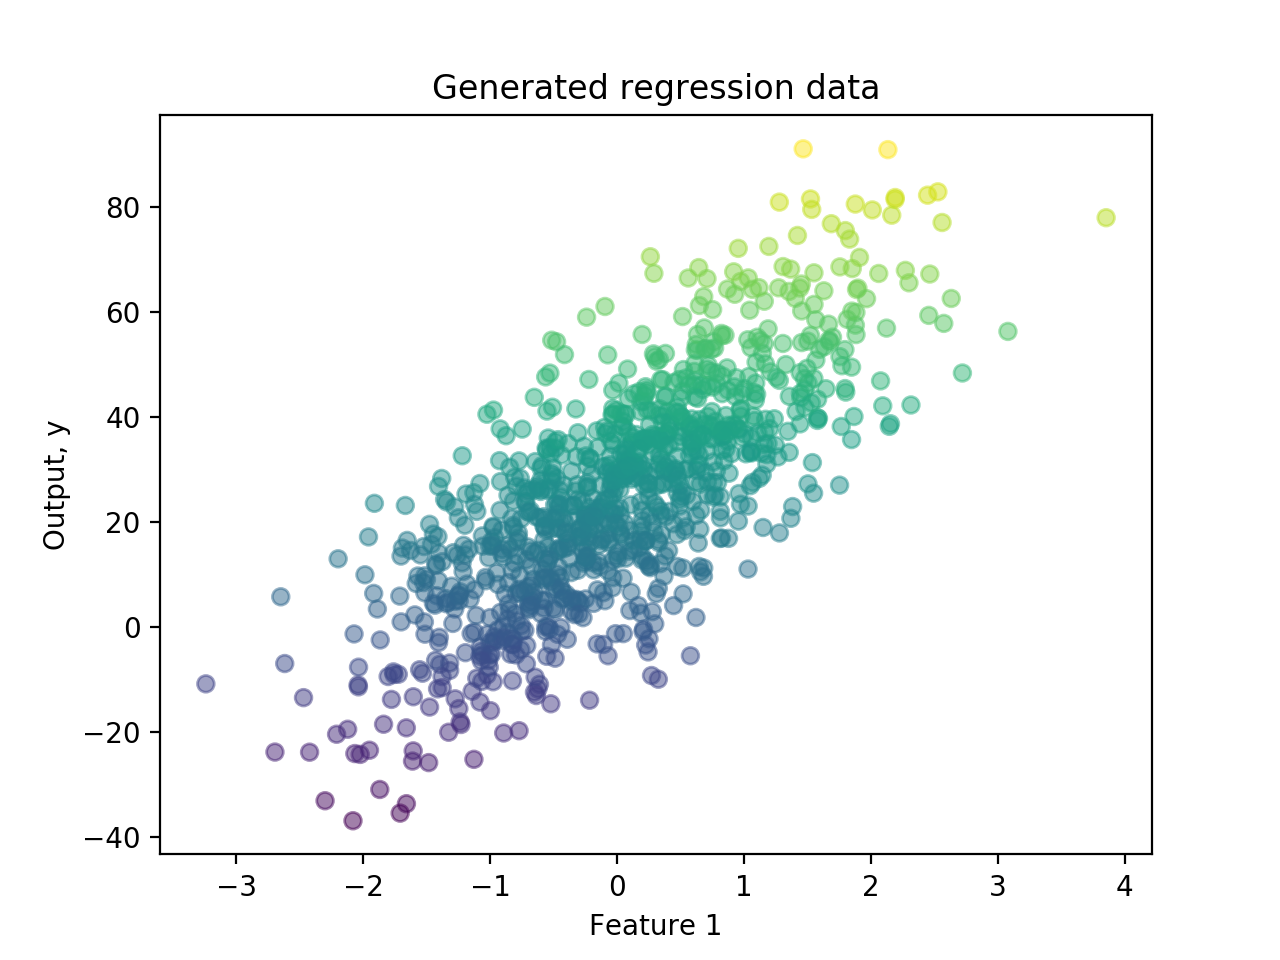

In [142]:
X,y,coeff=datasets.make_regression(n_samples=1000, n_features=1, n_targets=1, bias=25, 
                                   coef=True, noise=14, random_state=42)
f=plt.figure()
axs=plt.gca()
axs.scatter(X[:,0],y, c=y, alpha=0.5)
axs.set_xlabel("Feature 1")
axs.set_ylabel("Output, y")
axs.set_title("Generated regression data")
plt.show()

#### classification dataset

In [163]:
X,y=datasets.make_classification(n_samples=10000,
                                 n_features=20,
                                 n_informative=10,
                                 n_redundant=2, #linear combinations of n_informative features
                                 n_repeated=3, #duplicate features
                                 n_classes=3,
                             n_clusters_per_class=2,
                                 flip_y=0.05, #percentage of data with classes randomly flipped
                                 class_sep=5, #measure of seperation between the classes
                            shuffle=True,
                            random_state=42)

<IPython.core.display.Javascript object>


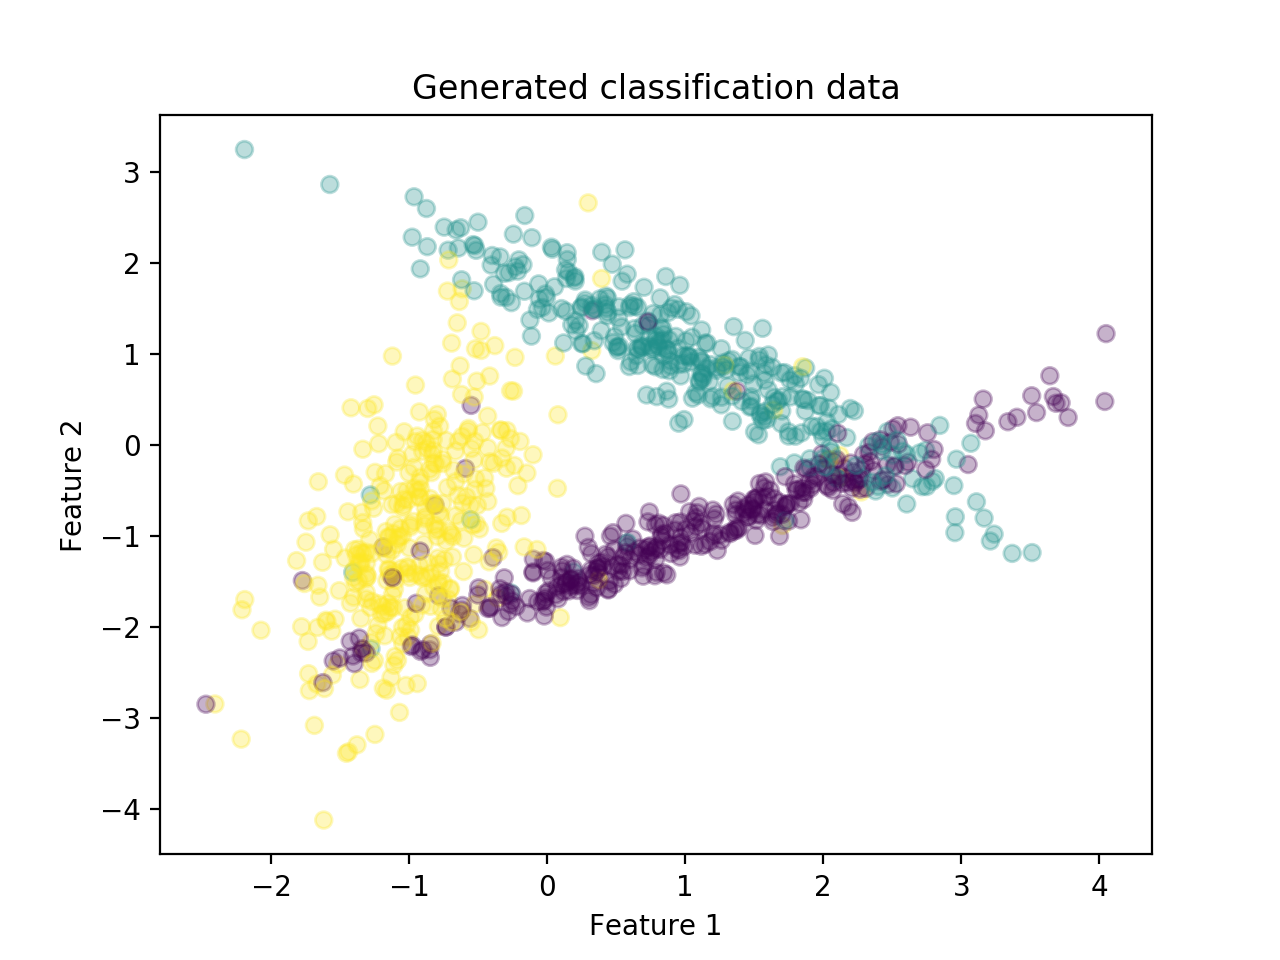

In [166]:
X,y=datasets.make_classification(n_samples=1000,
                                 n_features=2,
                                 n_informative=2,
                                 n_redundant=0,
                                 n_repeated=0,
                                 n_classes=3,
                             n_clusters_per_class=1,
                                 flip_y=0.05,
                                 class_sep=1,
                            shuffle=True,
                            random_state=42)
f=plt.figure()
axs=plt.gca()
axs.scatter(X[:,0],X[:,1], c=y, alpha=0.3)
axs.set_xlabel("Feature 1")
axs.set_ylabel("Feature 2")
axs.set_title("Generated classification data")
plt.show()

<IPython.core.display.Javascript object>


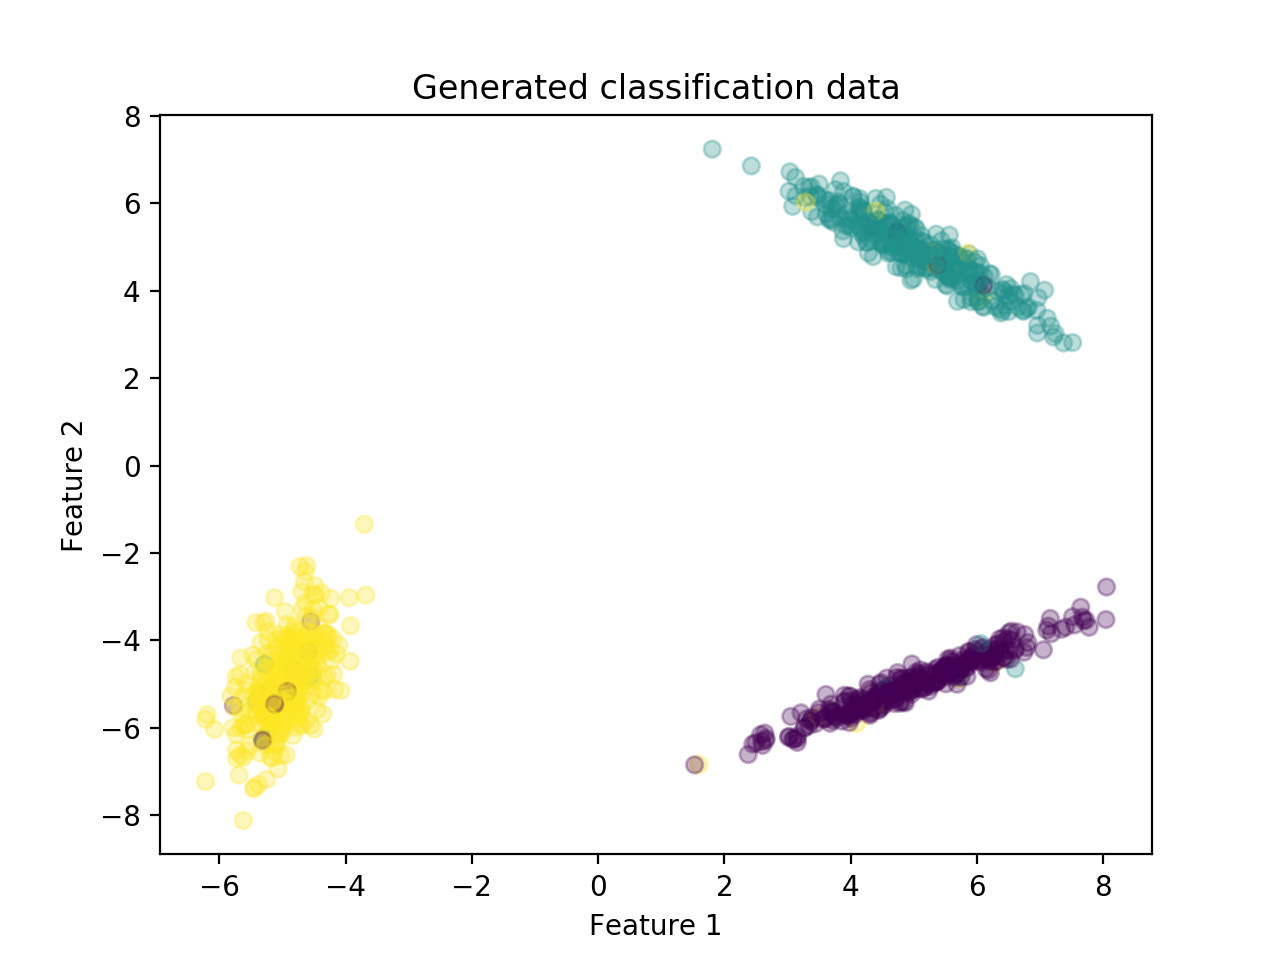

In [167]:
#same as above, with a wider class seperation
X,y=datasets.make_classification(n_samples=1000,
                                 n_features=2,
                                 n_informative=2,
                                 n_redundant=0,
                                 n_repeated=0,
                                 n_classes=3,
                             n_clusters_per_class=1,
                                 flip_y=0.05,
                                 class_sep=5,
                            shuffle=True,
                            random_state=42)
f=plt.figure()
axs=plt.gca()
axs.scatter(X[:,0],X[:,1], c=y, alpha=0.3)
axs.set_xlabel("Feature 1")
axs.set_ylabel("Feature 2")
axs.set_title("Generated classification data")
plt.show()

#### clustering dataset

In [180]:
X,y=datasets.make_blobs(n_samples=1000, n_features=20, 
                       centers=5, #number or list of cluster centers
                       cluster_std=1, #global std or list of stds
                       shuffle=True,
                       random_state=42
                       )
# make_blobs generates isotropic Gaussian distributions
#suitable for clustering

<IPython.core.display.Javascript object>


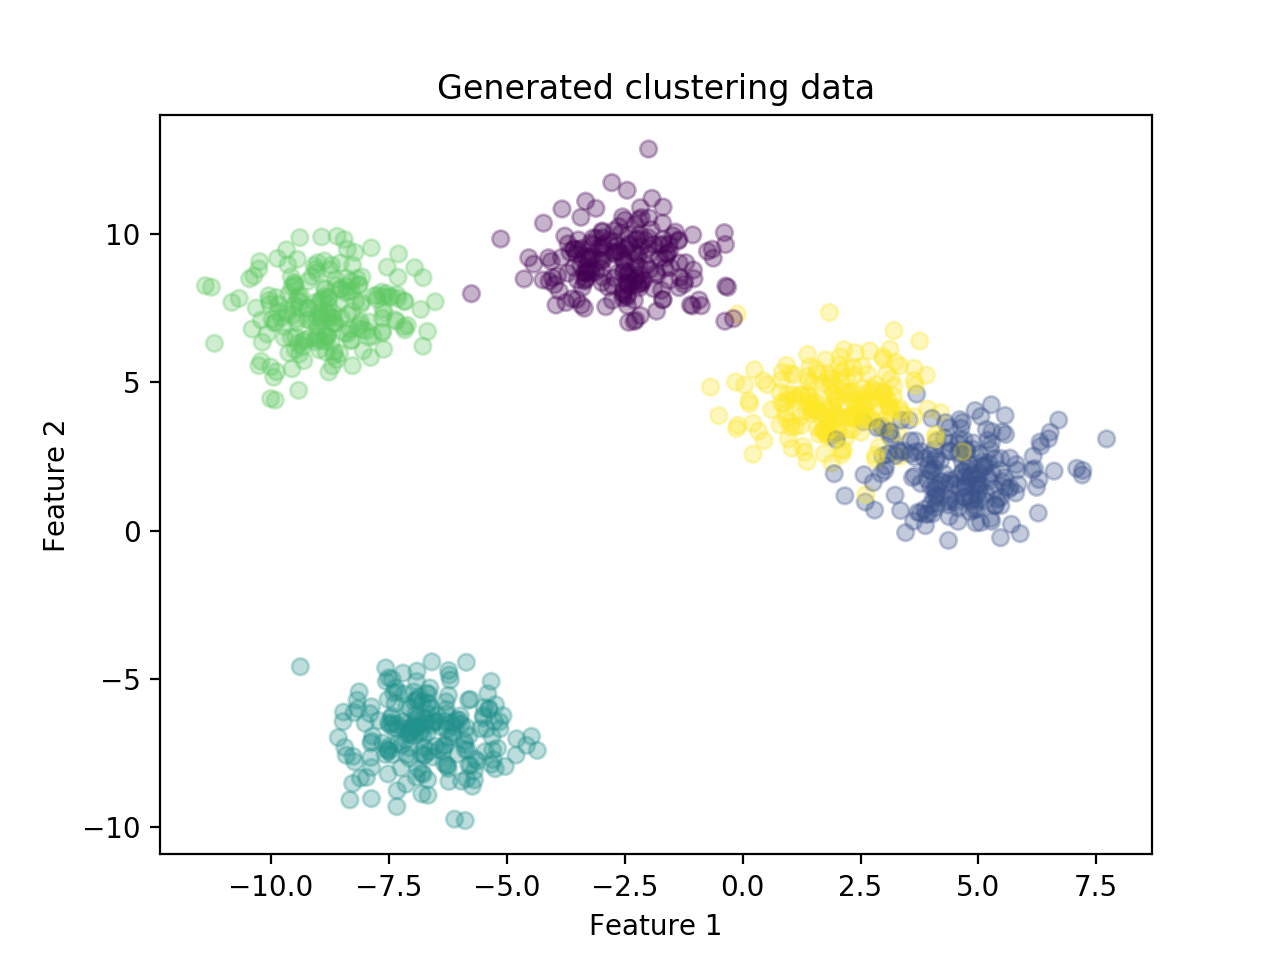

In [181]:
X,y=datasets.make_blobs(n_samples=1000, n_features=2, 
                       centers=5, #number or list of cluster centers
                       cluster_std=1, #global std or list of stds
                       random_state=42
                       )
f=plt.figure()
axs=plt.gca()
axs.scatter(X[:,0], X[:,1], c=y, alpha=0.3)
axs.set_xlabel("Feature 1")
axs.set_ylabel("Feature 2")
axs.set_title("Generated clustering data")
plt.show()

More generators here: http://scikit-learn.org/stable/datasets/index.html#generators-for-classification-and-clustering

### KNN Regression

In [6]:
from sklearn.neighbors import KNeighborsRegressor

In [188]:
X,y=datasets.make_regression(n_samples=1000, n_features=10, n_targets=1, random_state=42)
X_train,X_test, y_train, y_test=train_test_split(X,y)

In [195]:
knn_reg=KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train,y_train) #returns knn_reg instance, not required to save

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [193]:
knn_reg.score(X_test, y_test)

0.74753117045850659

### Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression

In [214]:
#sample data
X,y,coef=datasets.make_regression(n_samples=1000, n_features=12, coef=True, bias=3.4, random_state=42)
X_train,X_test, y_train,y_test=train_test_split(X,y, test_size=0.25)

In [215]:
coef

array([ 47.36307555,  18.92376025,  54.35402377,  37.57949023,
        99.39977334,  95.46173715,   0.        ,  43.86586844,
        57.76579961,   0.        ,  15.58603676,   1.73459269])

In [229]:
# Linear model fit using Least Square Linear Regression (Ordinary Least Square)
lm=LinearRegression(fit_intercept=True, #calculate bias
                 normalize=False, #normalize input data
                )
# Values of interest: lm.coef_, lm.intercept_, lm.residues_

In [230]:
lm=LinearRegression() #fit_intercept=True (default)
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [231]:
lm.coef_, lm.intercept_

(array([  4.73630755e+01,   1.89237603e+01,   5.43540238e+01,
          3.75794902e+01,   9.93997733e+01,   9.54617372e+01,
         -8.52651283e-14,   4.38658684e+01,   5.77657996e+01,
         -3.55271368e-14,   1.55860368e+01,   1.73459269e+00]),
 3.3999999999999999)

In [238]:
#Linear Regression without intercept
lm2=LinearRegression(fit_intercept=False) #without intercept/bias value
lm2.fit(X_train, y_train)
lm2.coef_, lm2.intercept_

(array([  4.72517636e+01,   1.86789861e+01,   5.44268741e+01,
          3.77419318e+01,   9.92877375e+01,   9.54889523e+01,
          8.56603446e-02,   4.39068508e+01,   5.76705608e+01,
         -1.02202756e-02,   1.55981695e+01,   1.64511570e+00]), 0.0)

In [239]:
#Linear regression of noisy data
X2,y2,coef2=datasets.make_regression(n_samples=1000, n_features=12, coef=True, bias=3.4, 
                                     noise=25,
                                     random_state=42)
X_train2,X_test2, y_train2,y_test2=train_test_split(X2,y2, test_size=0.25)
lmn=LinearRegression(fit_intercept=True) #with intercept/bias value
lmn.fit(X_train2, y_train2) 
lmn.coef_, lmn.intercept_ #improper fit for noisy data

(array([  5.38053646e+01,   1.89257318e+01,   4.69974889e+01,
          5.85615965e+01,   1.55899512e+01,   1.75656862e+00,
          1.21903978e+00,   3.45836118e+01,   9.91204223e+01,
          9.58158067e+01,   8.30331078e-02,   4.33662170e+01]),
 3.7028766531189587)

<IPython.core.display.Javascript object>


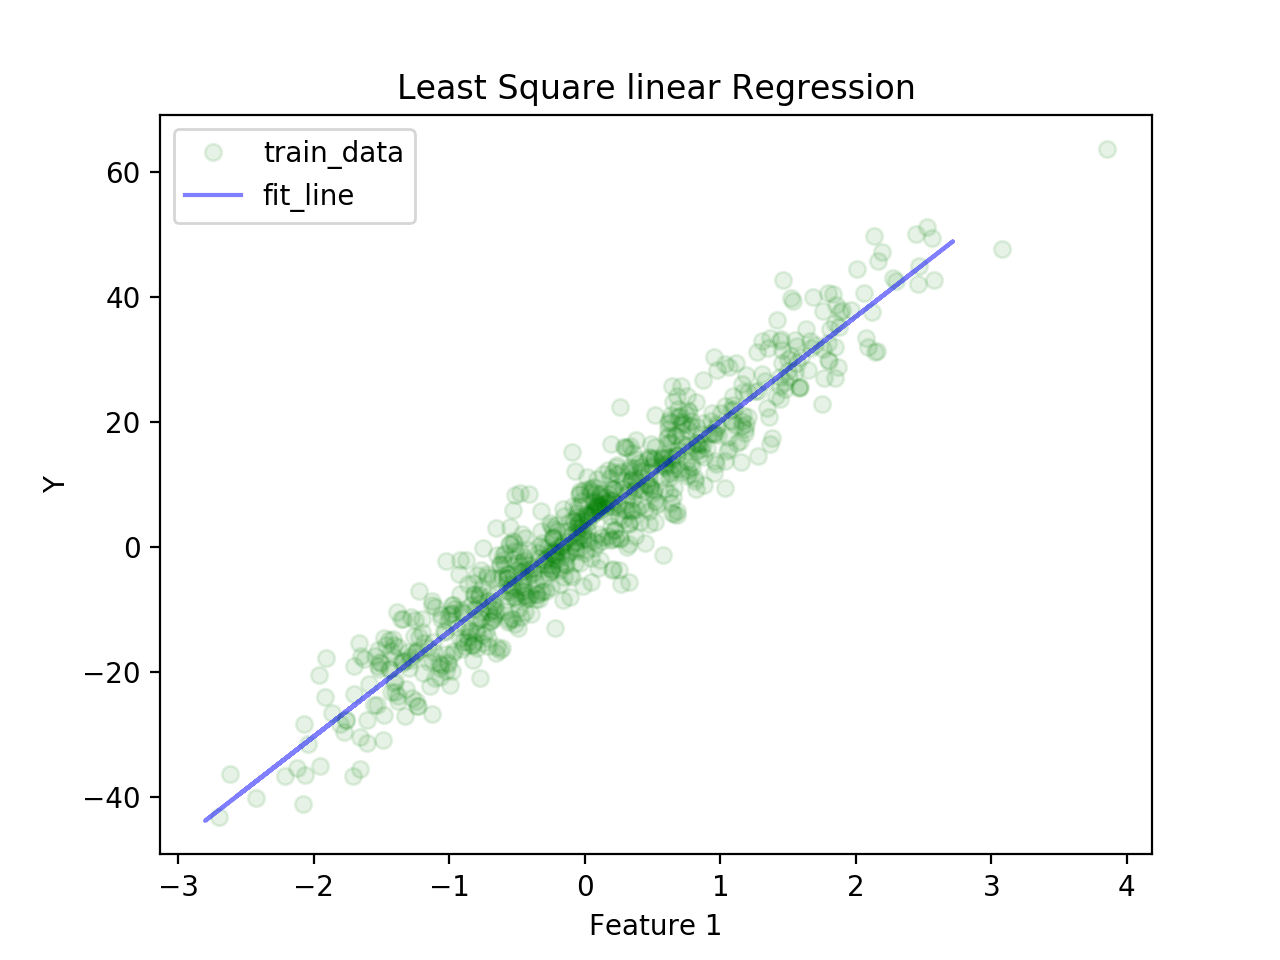

In [277]:
#Linear regression with plot of fit parametes
X2,y2,coef2=datasets.make_regression(n_samples=1000, n_features=1, coef=True, bias=3.4,noise=5, random_state=42)
X_train2,X_test2, y_train2,y_test2=train_test_split(X2,y2, test_size=0.25)
lm2=LinearRegression(fit_intercept=True) #with intercept/bias value
lm2.fit(X_train2, y_train2) 
lm2.coef_, lmn.intercept_
f=plt.figure()
axs=plt.gca()
axs.plot(X_train2[:,0], y_train2, 'o', color="green", alpha=0.1, label="train_data")
axs.plot(X_test[:,0], X_test[:,0]*lm2.coef_[0]+lm2.intercept_, '-', color="blue", alpha=0.5, label="fit_line")
axs.set_xlabel("Feature 1")
axs.set_ylabel("Y")
axs.set_title("Least Square linear Regression")
axs.legend()

<IPython.core.display.Javascript object>


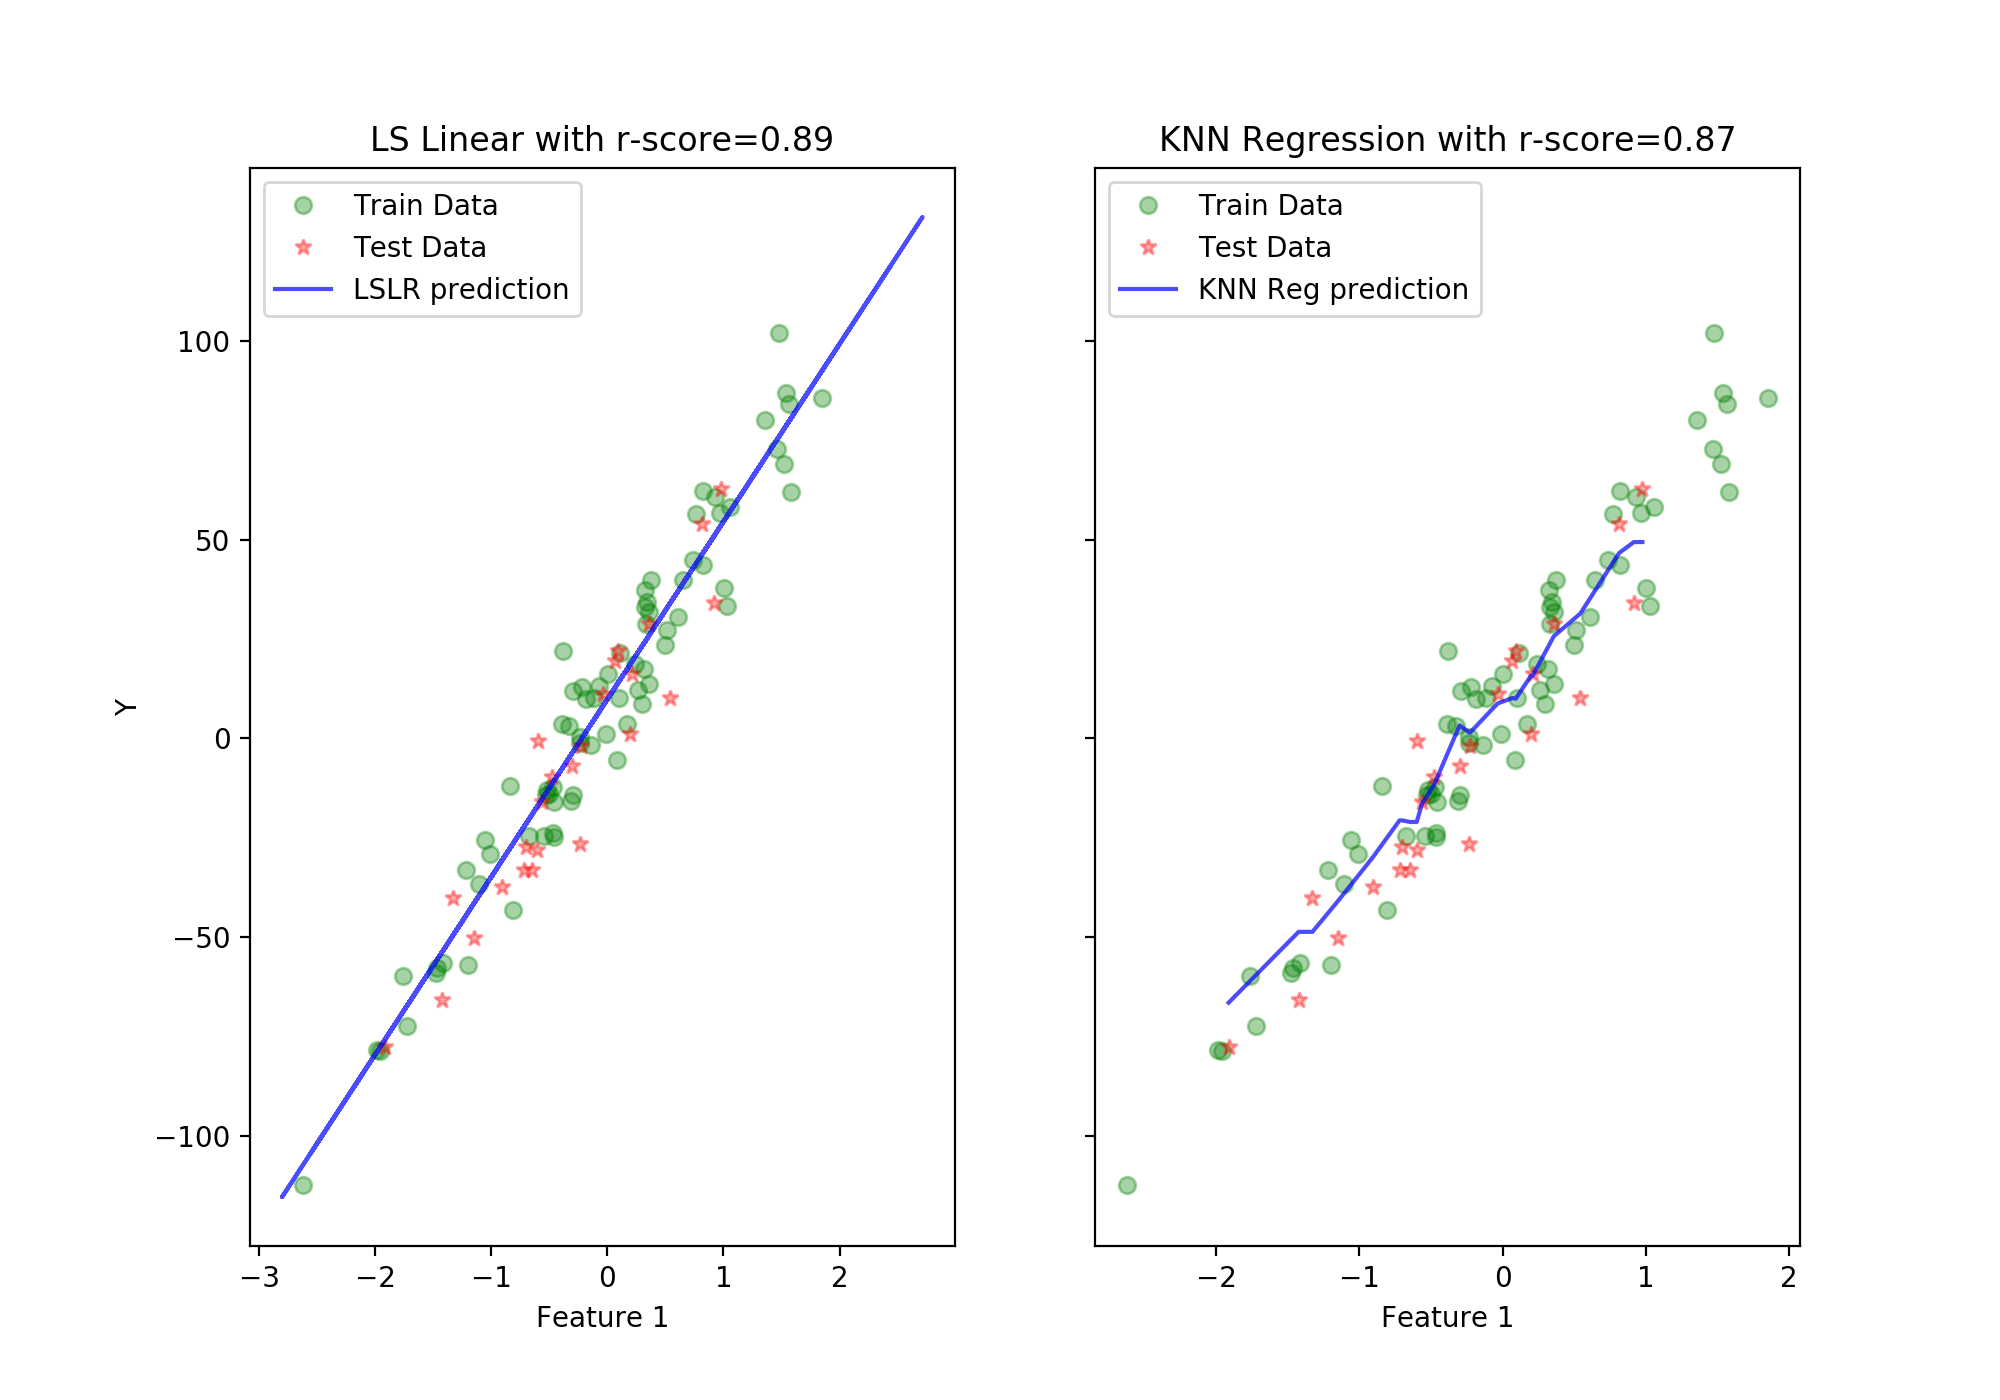

In [349]:
# Comparing KNN Regression with Least Squares regression fit
X2,y2,coef2=datasets.make_regression(n_samples=100, n_features=1, coef=True, bias=7.5,noise=12, random_state=42)
X_train2,X_test2, y_train2,y_test2=train_test_split(X2,y2, test_size=0.25)
#LSRM
lm2=LinearRegression(fit_intercept=True) #with intercept/bias value
lm2.fit(X_train2, y_train2)
score1=lm2.score(X_test2, y_test2)
#KNNR
knnr=KNeighborsRegressor(n_neighbors=10)
knnr.fit(X_train2, y_train2)
score2=knnr.score(X_test2, y_test2)

#LSRM subplot
f,ax=plt.subplots(1,2, sharey=True, figsize=(10,7))
data_alpha=0.35
line_alpha=0.7
axs=ax[0]
axs.plot(X_train2[:,0], y_train2, 'o', color="green", alpha=data_alpha, label="Train Data")
axs.plot(X_test2[:,0], y_test2, '*', color="red", alpha=data_alpha, label="Test Data")
axs.plot(X_test[:,0], X_test[:,0]*lm2.coef_[0]+lm2.intercept_, '-', 
         color="blue", alpha=line_alpha, label="LSLR prediction")
axs.set_xlabel("Feature 1")
axs.set_ylabel("Y")
axs.set_title("LS Linear with r-score={:0.2f}".format(score1))
axs.legend(loc=2)

#KNNR subplot
axs2=ax[1]
df=pd.DataFrame({"xt":X_test2[:,0], "yhat":knnr.predict(X_test2)}).sort_values("xt")
axs2.plot(X_train2[:,0], y_train2, 'o', color="green", alpha=data_alpha, label="Train Data")
axs2.plot(X_test2[:,0], y_test2, '*', color="red", alpha=data_alpha, label="Test Data")
axs2.plot(df["xt"],df["yhat"],'-', color="blue", alpha=line_alpha, label="KNN Reg prediction")
axs2.set_xlabel("Feature 1")
axs2.set_title("KNN Regression with r-score={:0.2f}".format(score2))
axs2.legend(loc=2);

### Ridge Regression

In [8]:
from sklearn.linear_model import Ridge

In [359]:
X,y,coef=datasets.make_regression(n_samples=1000, n_features=12, coef=True, bias=3.4,random_state=42)
X_train,X_test, y_train,y_test=train_test_split(X,y, train_size=0.75)
coef,3.4

(array([ 47.36307555,  18.92376025,  54.35402377,  37.57949023,
         99.39977334,  95.46173715,   0.        ,  43.86586844,
         57.76579961,   0.        ,  15.58603676,   1.73459269]), 3.4)

In [354]:
# Ridge Regression
rr=Ridge(alpha=1.0, #regularization parameter
        fit_intercept=True,
        normalize=True
        )

In [360]:
rr=Ridge(alpha=1.0)
rr.fit(X_train, y_train)
rr.coef_, rr.intercept_

(array([  4.73021954e+01,   1.88886721e+01,   5.42765529e+01,
          3.75392199e+01,   9.92626288e+01,   9.53288315e+01,
         -1.00730330e-02,   4.38054140e+01,   5.76792894e+01,
          8.82583974e-03,   1.55411837e+01,   1.72635066e+00]),
 3.4015365137279034)

In [ ]:
rr=Ridge(alpha=1.0)
rr.fit(X_train, y_train)
rr.coef_, rr.intercept_

In [9]:
from matplotlib.gridspec import GridSpec

<IPython.core.display.Javascript object>


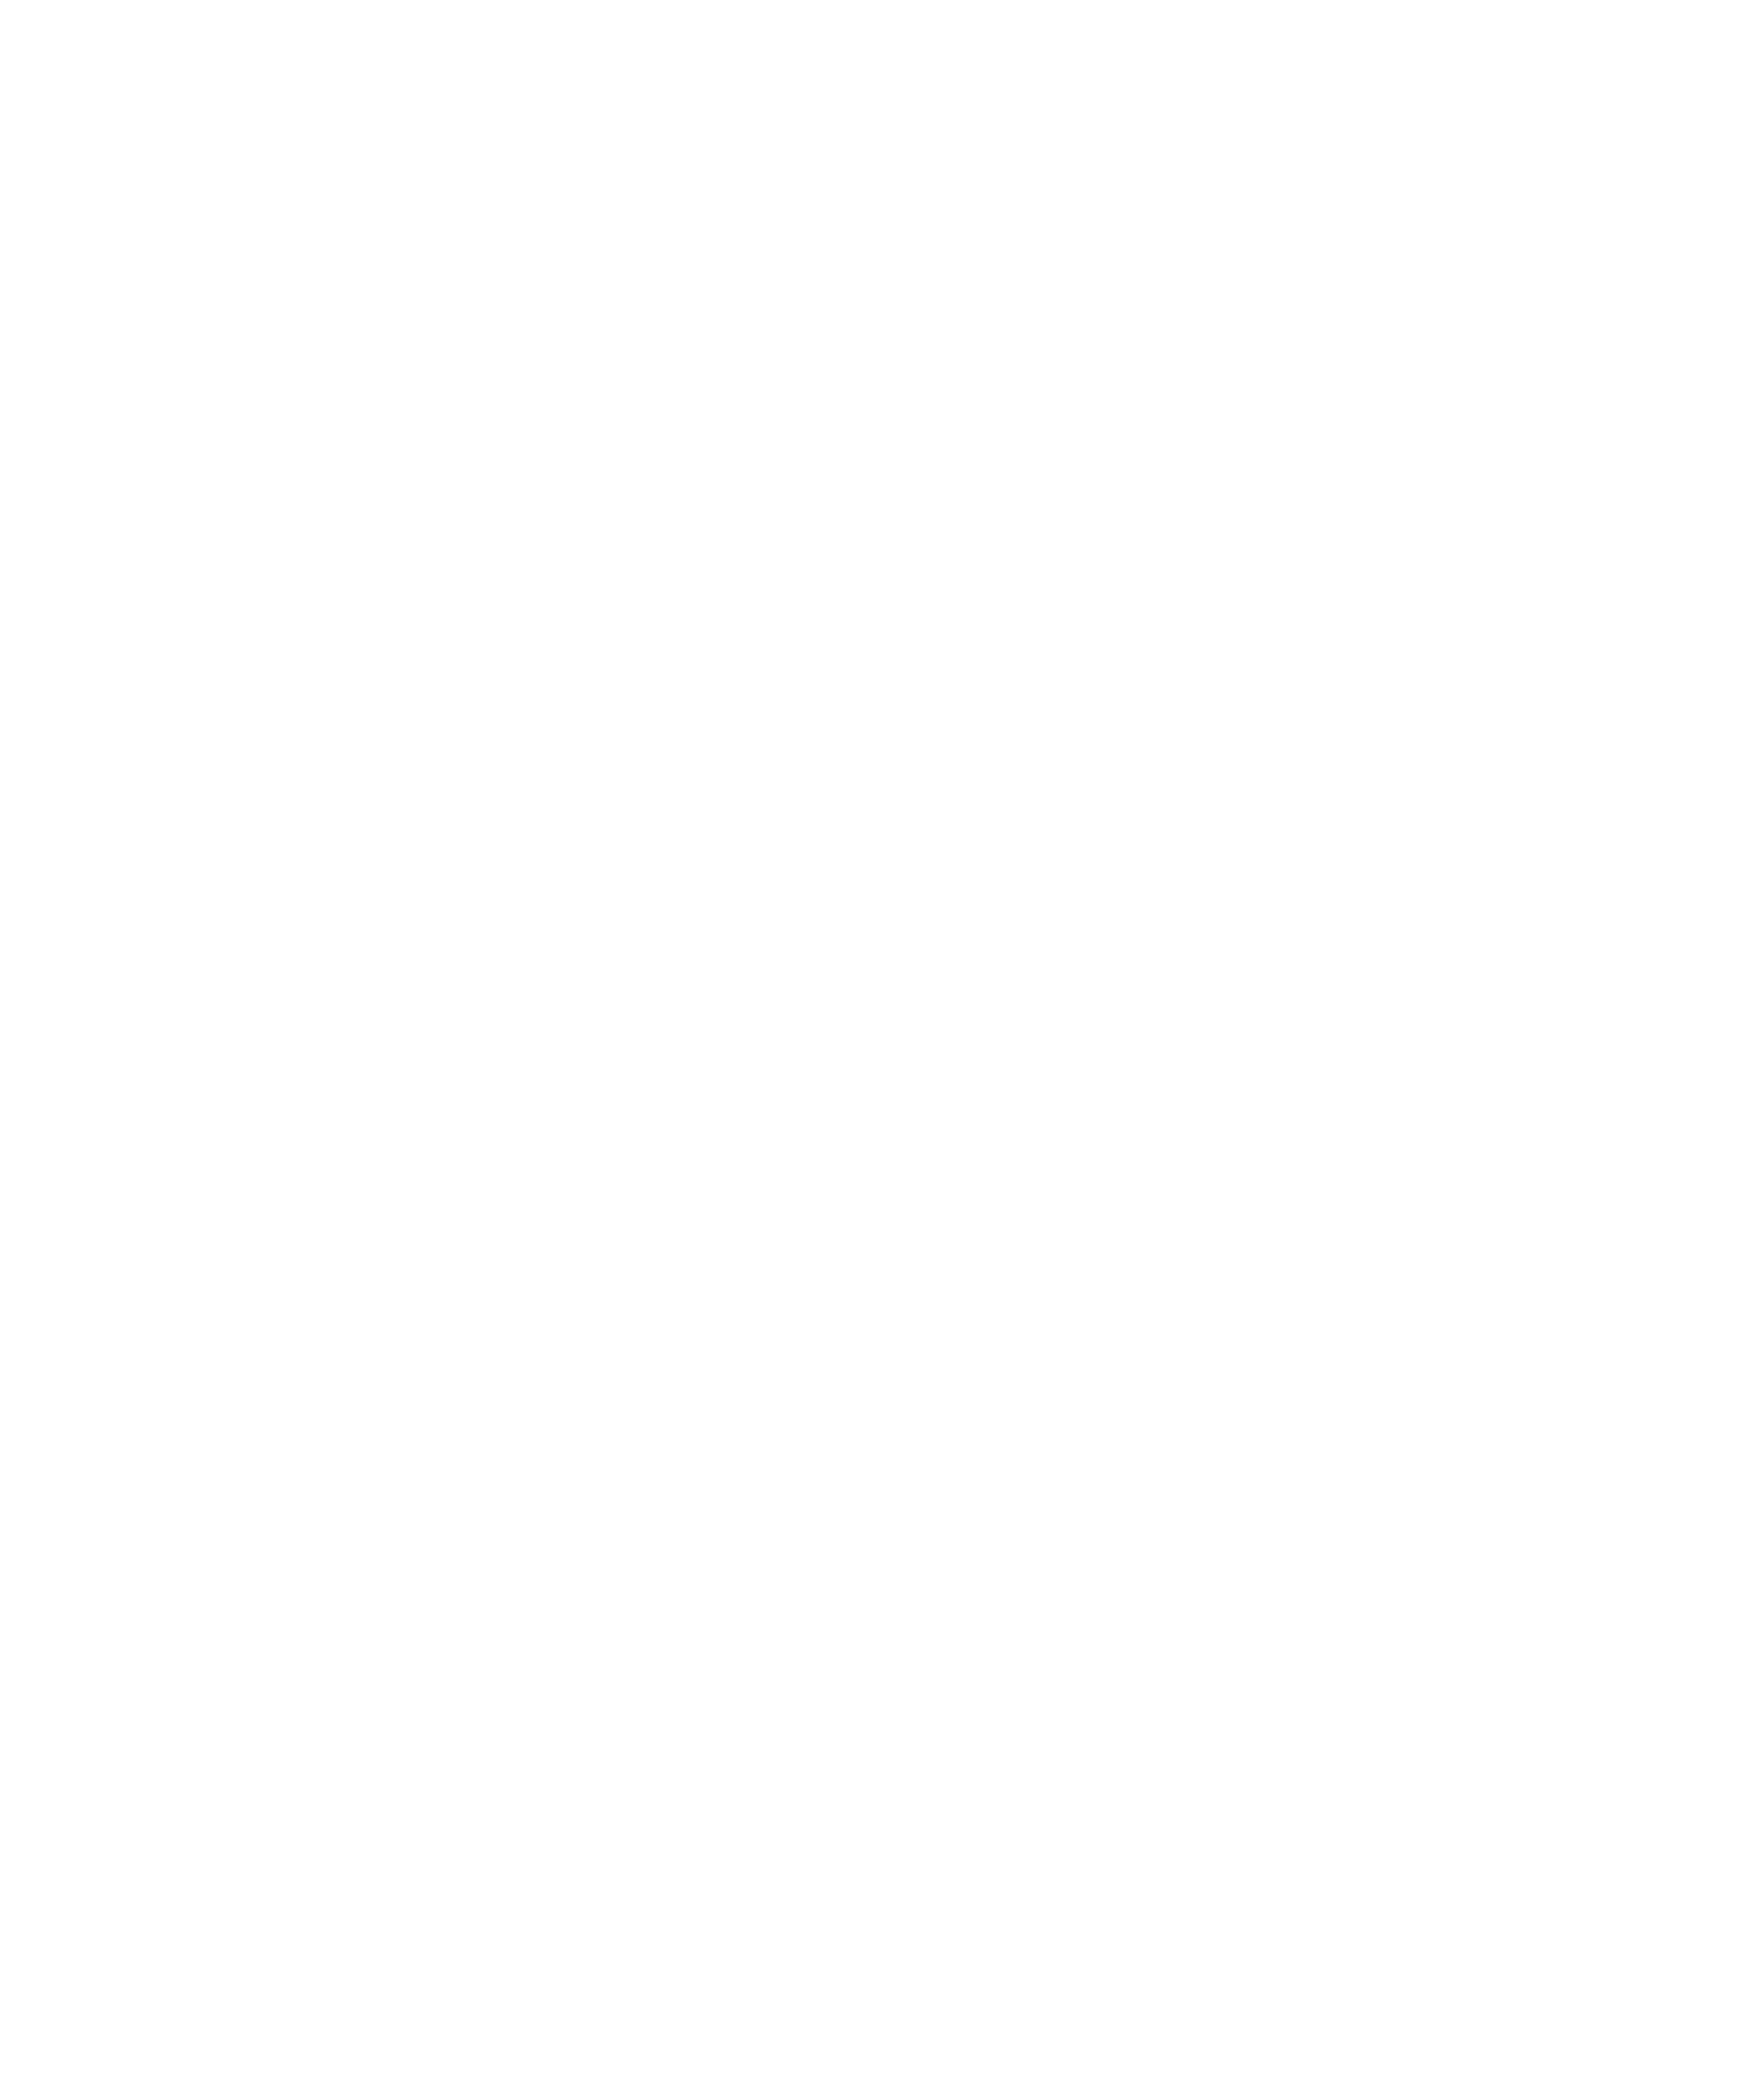

Exception: Data must be 1-dimensional

In [449]:
# Ridge regression for varying alpha values
X,y,coef=datasets.make_regression(n_samples=300, n_features=30, coef=True, bias=3.4, noise=9, random_state=42)
X_train,X_test, y_train,y_test=train_test_split(X,y, train_size=0.75)
alphas=[0,1,5,10,30,50,100,1000,10000]
grid=GridSpec(3,3)
f=plt.figure(figsize=(10,12))
data_alpha=0.1
line_alpha=0.8
lslr=Ridge(alpha=0).fit(X_train, y_train)
df0=pd.DataFrame({"feat":X_test[:,0], "yhat":X_test*lslr.coef_+lslr.intercept_}).sort_values("yhat")
for i,alpha in enumerate(alphas):
    rr=Ridge(alpha=alpha)
    rr.fit(X_train, y_train)
    score=rr.score(X_test, y_test)
    r,c=i//3,i%3
    ax=plt.subplot(grid[r,c])
    ax.tick_params(axis="both", top="off", left="off", right="off", bottom="off",
                   labeltop="off", labelleft="off", labelright="off", labelbottom="off")
    if c==0:
        ax.tick_params(axis="y", left="on", labelleft="on")
    if r==2:
        ax.tick_params(axis="x", bottom="on", labelbottom="on")
    ax.plot(X_train[:,0], y_train, 'o', color="green", alpha=data_alpha, label="Train")
    ax.plot(X_test[:,0], y_test, '*', color="red", alpha=data_alpha, label="Test")
    df=pd.DataFrame({"feat":X_test[:,0], "yhat":X_test[:,0]*rr.coef_+rr.intercept_}).sort_values("yhat")
    ax.plot(df0["feat"],df0["yhat"] , '--', color="gray", alpha=line_alpha, label="LS Line")
    ax.plot(df["feat"],df["yhat"] , '-', color="blue", alpha=line_alpha,label="Ridge Line")
    ax.set_title("r-score={:.2f}, alpha={}".format(score,alpha))
    ax.legend()
# alpha=0        => RIDGE = LEAST SQUARE
# alpha = np.inf => RIDGE = LINE THROUGH MEAN OF DATA

### Feature Normalization (MinMax Scaling)

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [409]:
mnmx=MinMaxScaler(feature_range=(0,1)) #range of normalized feature values, default is [0,1]

In [414]:
X,y=datasets.make_regression(n_samples=1000, n_features=5, shuffle=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75)
mnmx=MinMaxScaler()
mnmx.fit(X_train) #min,max values of train features is used for normalizing both train and test features
X_train=mnmx.transform(X_train)
X_test=mnmx.transform(X_test)
# or
#X_train=MinMaxSclaer().fit(X_train).transform(X_train)

<IPython.core.display.Javascript object>


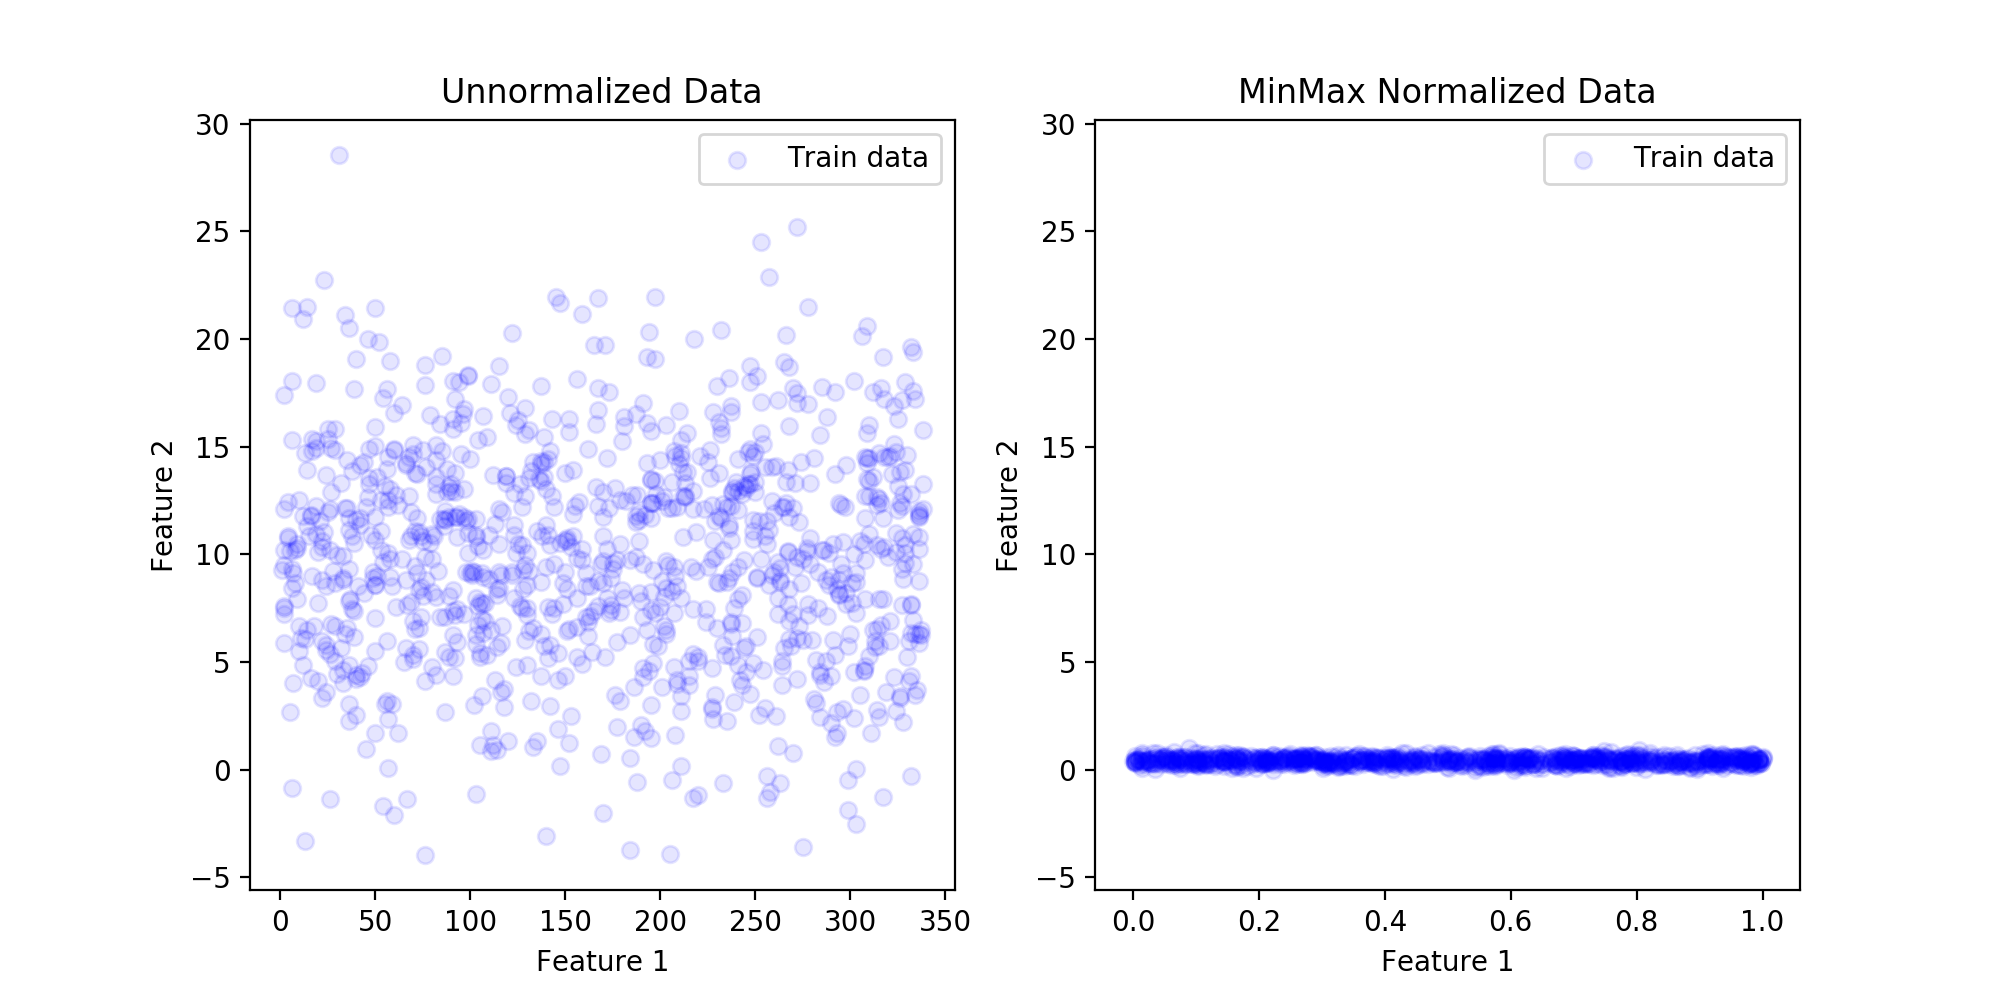

In [445]:
# MinMaxScaling
df=pd.DataFrame({"x1":np.random.randint(1, 340, 1000), "x2":np.random.normal(10, 5, 1000)})
dat=np.array(df)
dat2=MinMaxScaler().fit_transform(dat)
grid=GridSpec(1,2)
f=plt.figure(figsize=(10,5))
# Raw features
ax1=plt.subplot(grid[0,0])
ax1.scatter(df["x1"], df["x2"], color="blue", alpha=0.1, label="Train data")
ax1.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")
ax1.set_title("Unnormalized Data")
ax1.legend(loc=1)
# Normalized features
ax2=plt.subplot(grid[0,1], sharey=ax1)
plt.scatter(dat2[:,0], dat2[:,1], color="blue", alpha=0.1, label="Train data")
#normalized date is in the range [0,1]
ax2.set_xlabel("Feature 1")
ax2.set_ylabel("Feature 2")
ax2.set_title("MinMax Normalized Data")
ax2.legend(loc=1);

### Feature Noralization (Standard Scaling)

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
StandardScaler(with_mean=True, #centering, by subtracting mean (default)
              with_std=True, #dividing by stadard deviation (default)
              )
# Normalizes the features by centering (subtracting) and dividing by standard deviation. 
# The resultant data has mean=0, std=1
#Feature normalization is especially required for SVM and L1,L2 reglularization procedures.

StandardScaler(copy=True, with_mean=True, with_std=True)

Mean of normalized features:  [-0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0. -0. -0.  0.  0. -0.  0. -0.
  0.  0.  0.  0.  0. -0.  0.]
Standard Deviation of normalized features:  [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.]


<IPython.core.display.Javascript object>


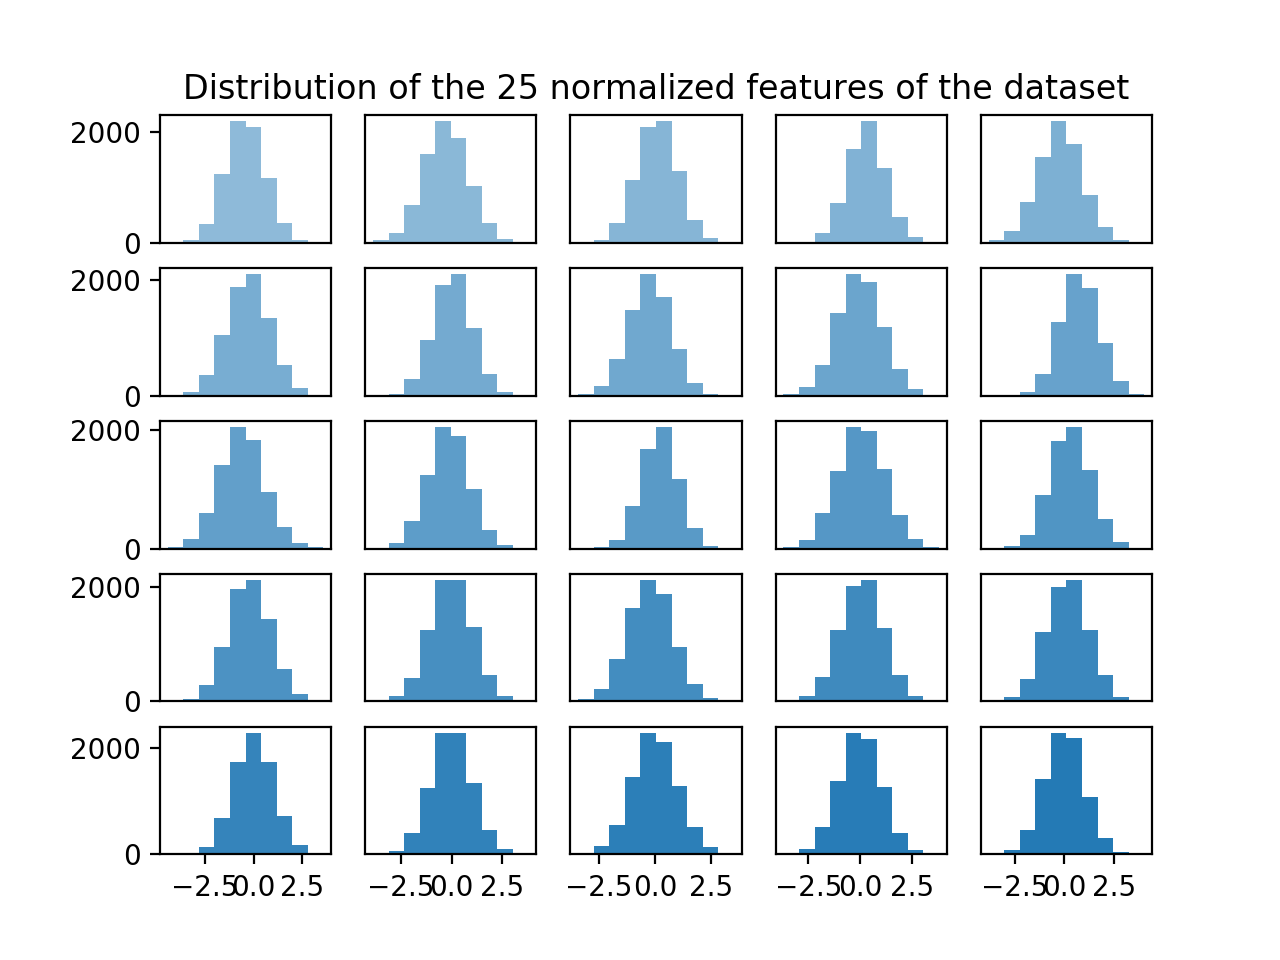

In [112]:
X,y=datasets.make_regression(n_samples=10000, n_features=25, noise=20)
X_train,X_test, y_train,y_test=train_test_split(X,y,train_size=0.75)
norm=StandardScaler().fit(X_train)
X_train_norm=norm.transform(X_train)
X_test_norm=norm.transform(X_test)
print("Mean of normalized features: ", np.round(np.mean(X_train_norm, axis=0), 2))
print("Standard Deviation of normalized features: ", np.round(np.std(X_train_norm, axis=0), 2))
df=pd.DataFrame(X_train_norm)
#df.plot(kind="hist", alpha=0.1)
f,axes=plt.subplots(5,5)
cols=df.columns
for r,row in enumerate(axes):
    for c,ax in enumerate(row):
        plt.sca(ax)
        idx=(r*5)+c
        plt.hist(df[cols[idx]], alpha=0.5+(idx/50))
        if r==0 and c==2:
            plt.title("Distribution of the 25 normalized features of the dataset")
        if r!=4:
            plt.tick_params(axis="x", bottom="off", labelbottom="off")
        if c!=0:
            plt.tick_params(axis="y", left="off", labelleft="off")

<IPython.core.display.Javascript object>


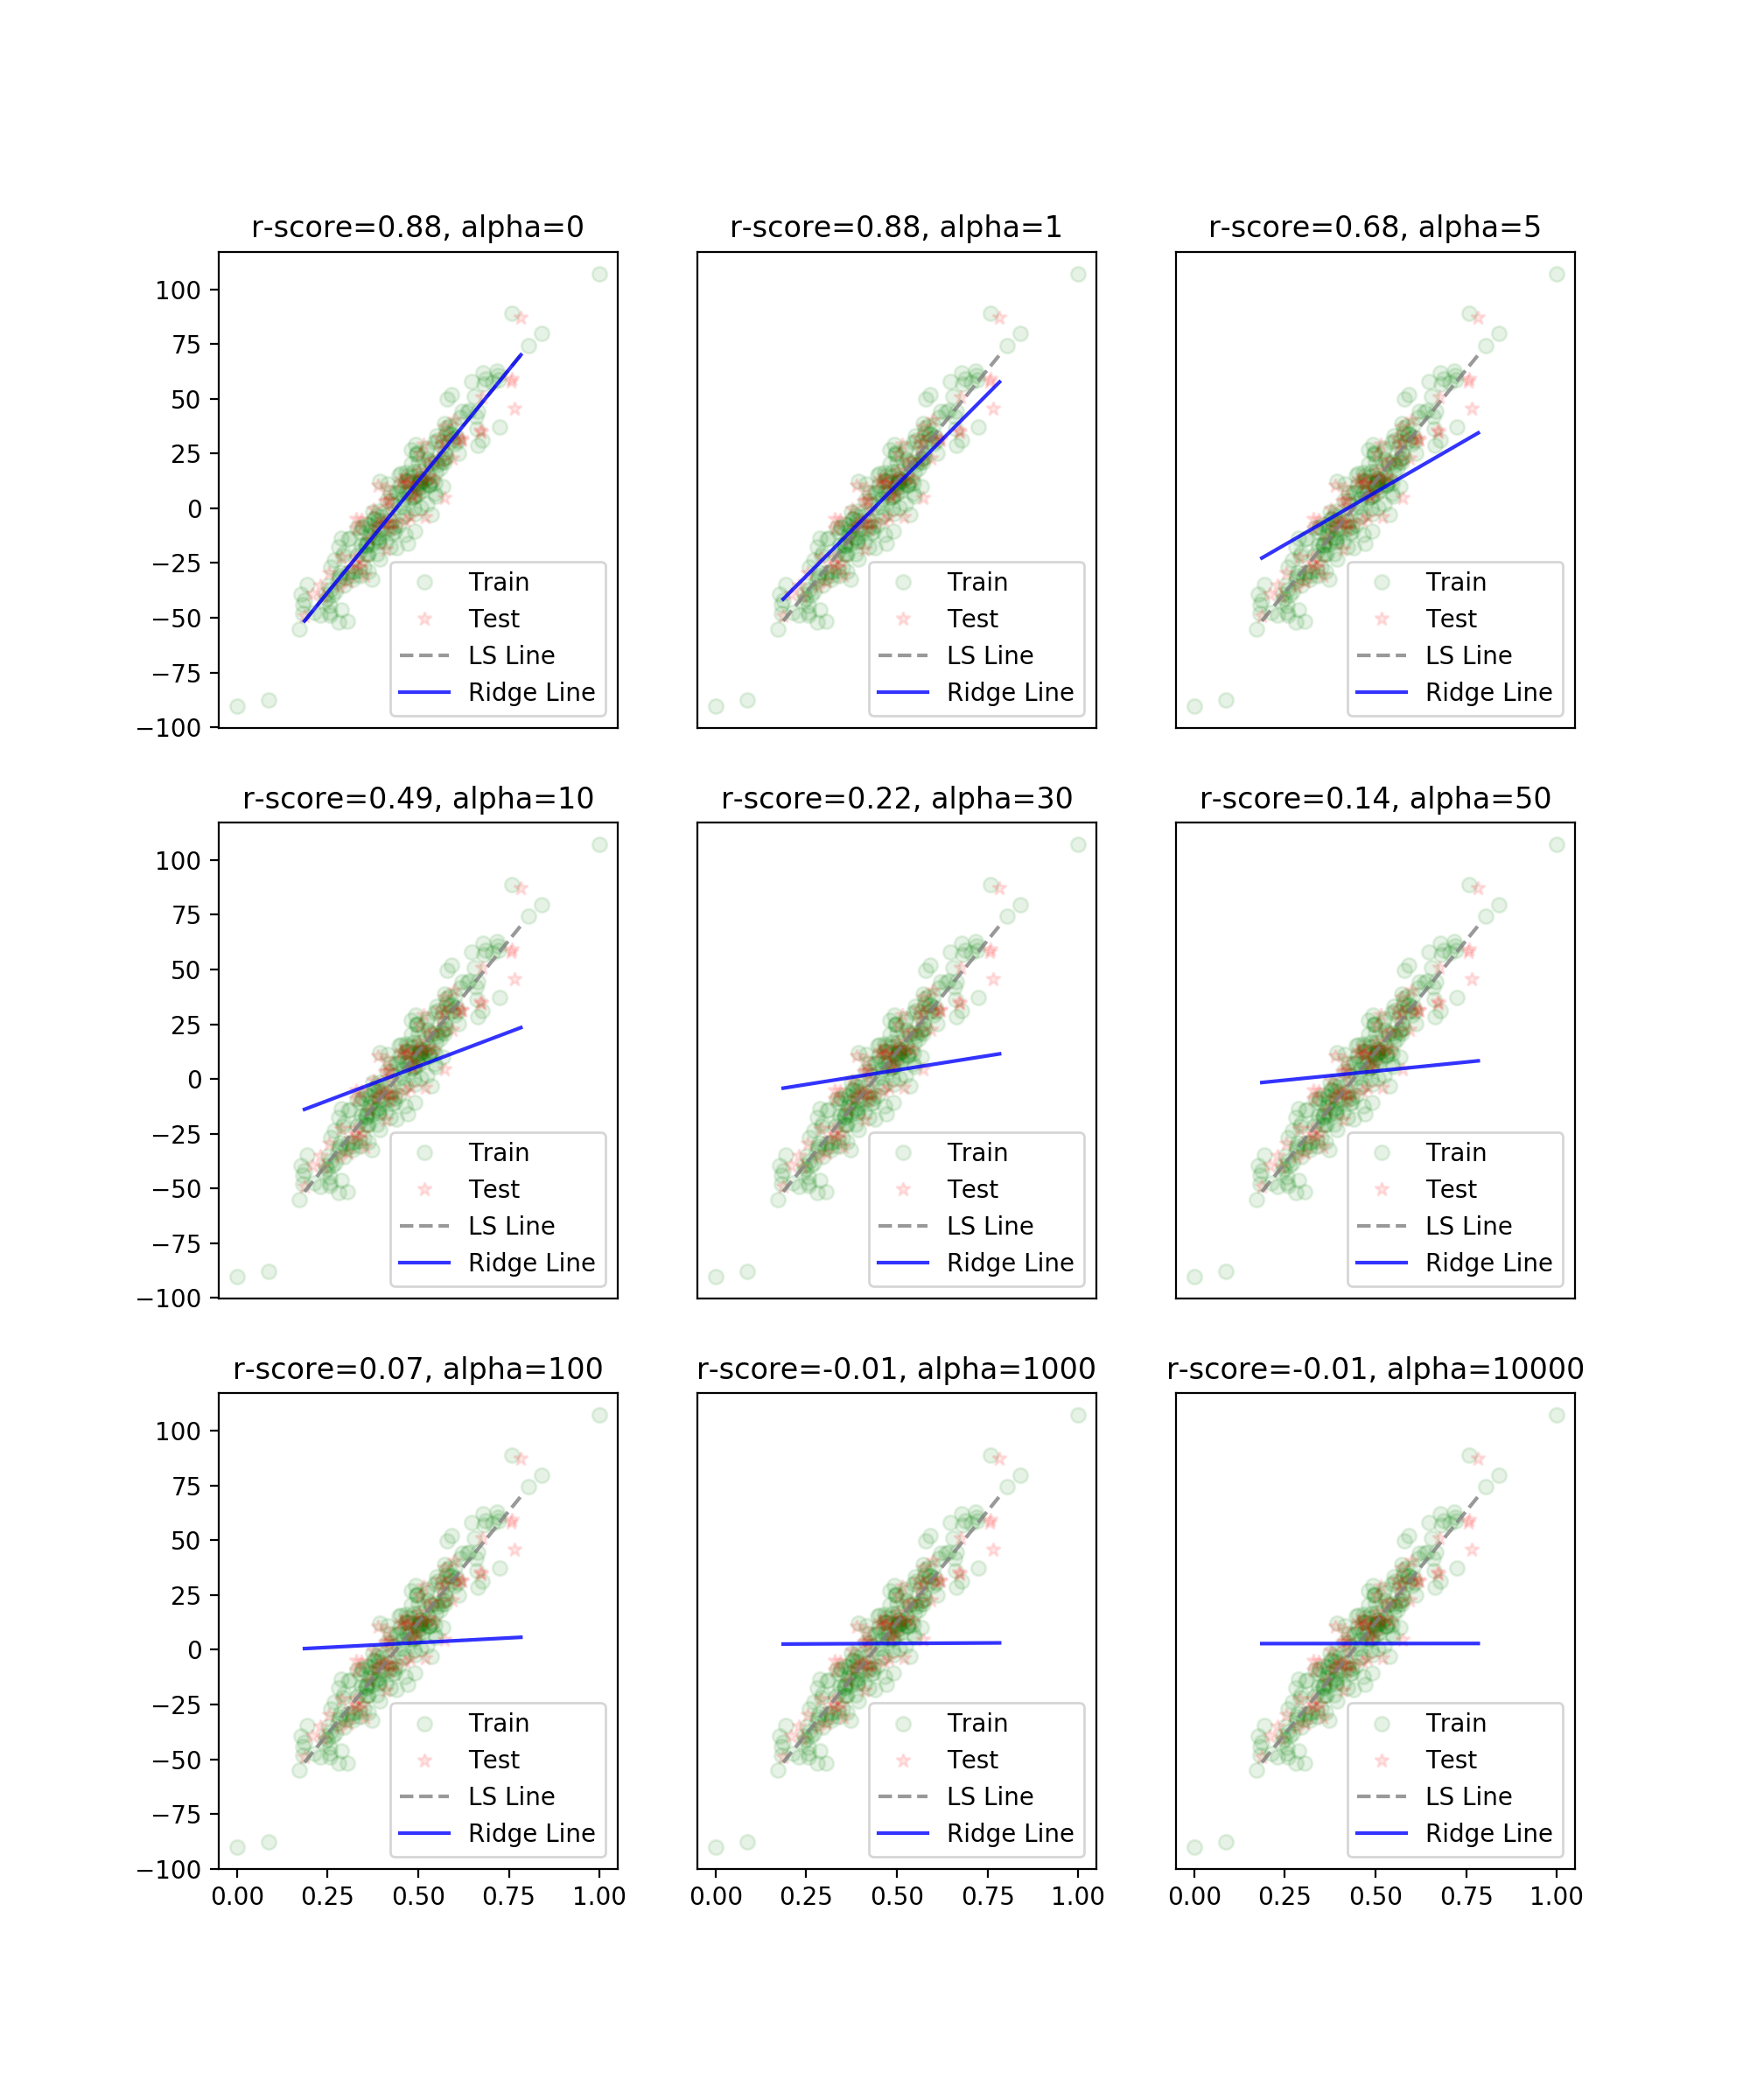

In [447]:
# Ridge regression for varying alpha values with normalization
X,y,coef=datasets.make_regression(n_samples=300, n_features=1, coef=True, bias=3.4, noise=9, random_state=42)
X_train,X_test, y_train,y_test=train_test_split(X,y, train_size=0.75)
scaler=MinMaxScaler()
scaler.fit(X_train) #dont fit on the X_test, which is "data leakage"
#X_train and X_test are scaled
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
alphas=[0,1,5,10,30,50,100,1000,10000]
grid=GridSpec(3,3)
f=plt.figure(figsize=(10,12))
data_alpha=0.1
line_alpha=0.8
lslr=Ridge(alpha=0).fit(X_train, y_train)
df0=pd.DataFrame({"feat":X_test[:,0], "yhat":X_test[:,0]*lslr.coef_+lslr.intercept_}).sort_values("yhat")
for i,alpha in enumerate(alphas):
    rr=Ridge(alpha=alpha)
    rr.fit(X_train, y_train)
    score=rr.score(X_test, y_test)
    r,c=i//3,i%3
    ax=plt.subplot(grid[r,c])
    ax.tick_params(axis="both", top="off", left="off", right="off", bottom="off",
                   labeltop="off", labelleft="off", labelright="off", labelbottom="off")
    if c==0:
        ax.tick_params(axis="y", left="on", labelleft="on")
    if r==2:
        ax.tick_params(axis="x", bottom="on", labelbottom="on")
    ax.plot(X_train[:,0], y_train, 'o', color="green", alpha=data_alpha, label="Train")
    ax.plot(X_test[:,0], y_test, '*', color="red", alpha=data_alpha, label="Test")
    df=pd.DataFrame({"feat":X_test[:,0], "yhat":X_test[:,0]*rr.coef_+rr.intercept_}).sort_values("yhat")
    ax.plot(df0["feat"],df0["yhat"] , '--', color="gray", alpha=line_alpha, label="LS Line")
    ax.plot(df["feat"],df["yhat"] , '-', color="blue", alpha=line_alpha,label="Ridge Line")
    ax.set_title("r-score={:.2f}, alpha={}".format(score,alpha))
    ax.legend()
# alpha=0        => RIDGE = LEAST SQUARE
# alpha = np.inf => RIDGE = LINE THROUGH MEAN OF DATA

### Lasso Regression

In [11]:
from sklearn.linear_model import Lasso

In [453]:
# Lasso Regression
Lasso(alpha=1.0, #regularization parameter
     fit_intercept=True,
     max_iter=1000,
     normalize=False
     )

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [509]:
# Lasso Regression
X,y,coef=datasets.make_regression(n_samples=10000, n_features=25, noise=4, coef=True, bias=3.4, random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X,y, train_size=0.75)

#Lasso model
lasso=Lasso(alpha=2, fit_intercept=True)
lasso.fit(X_train, y_train)
score=lasso.score(X_test, y_test)
W,b=lasso.coef_, lasso.intercept_
df=pd.DataFrame({"actual_weights":[3.4]+np.round(coef, 2).tolist(),
                 "predicted_weights":[np.round(b,2)]+np.round(W, 2).tolist()},
                index=["intercept"]+["w{}".format(i) for i in range(1,len(lasso.coef_)+1)]
               )
print(df)
print("r-score: {:.3f}".format(score))
print("Total features = {}, Retained features = {}, skipped features = {}".format(len(df), 
                                                                                  sum(df["predicted_weights"]!=0),
                                                                                  sum(df["predicted_weights"]==0)))

           actual_weights  predicted_weights
intercept            3.40               3.43
w1                   0.00               0.00
w2                  79.07              76.96
w3                   0.00              -0.00
w4                   0.00               0.00
w5                  56.47              54.48
w6                   0.00               0.00
w7                  40.06              38.05
w8                   0.00               0.00
w9                   0.00               0.00
w10                  0.00              -0.00
w11                  0.00              -0.00
w12                 31.99              29.94
w13                  0.00               0.00
w14                 84.06              82.05
w15                 73.03              71.12
w16                  0.00              -0.00
w17                  0.00              -0.00
w18                 70.46              68.63
w19                  0.00               0.00
w20                  0.00              -0.00
w21       

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:12: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


<IPython.core.display.Javascript object>


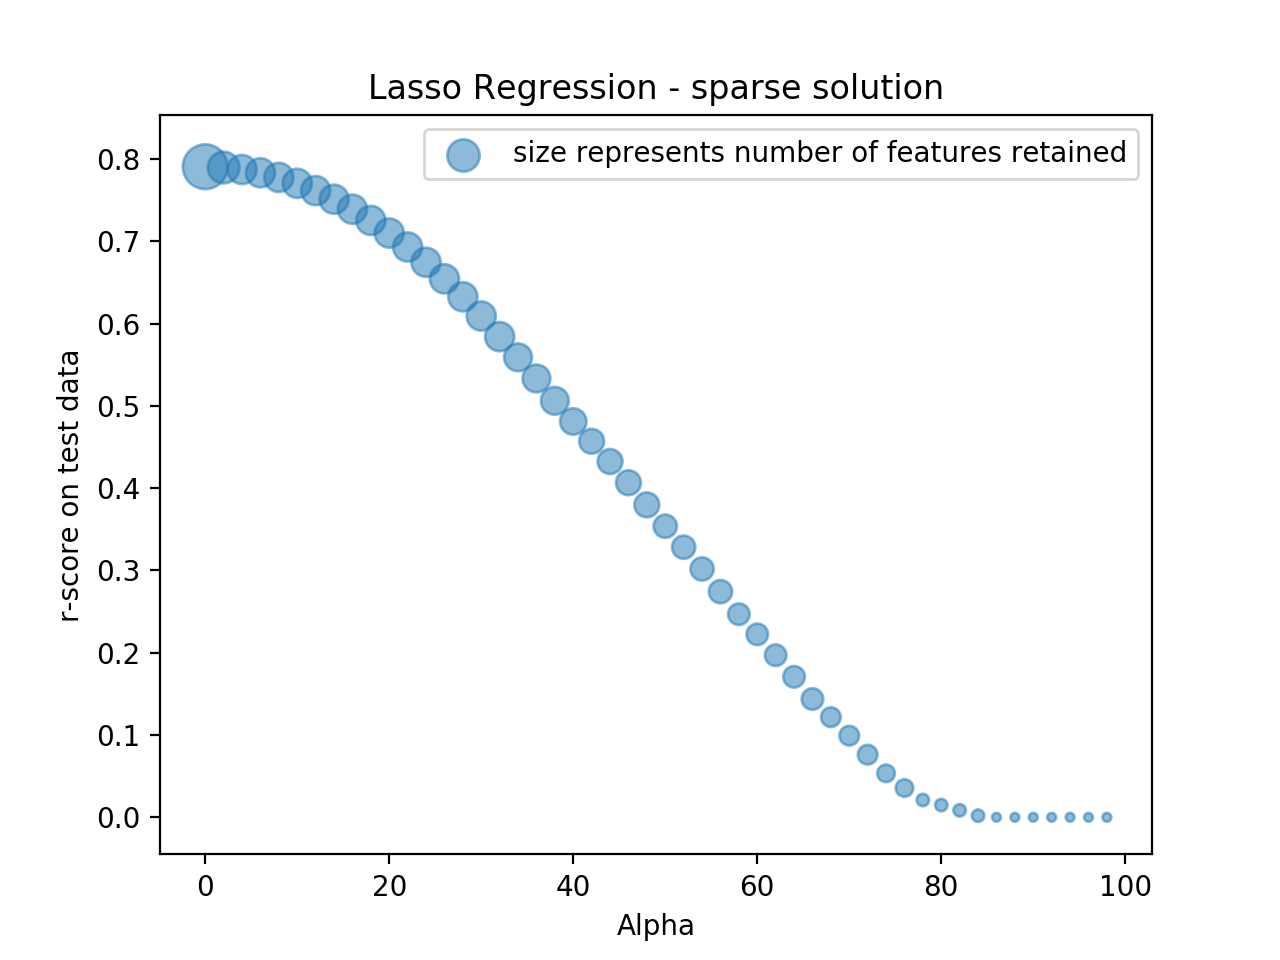

In [568]:
# Lasso Regression
X,y,coef=datasets.make_regression(n_samples=10000, n_features=25, noise=100, coef=True, bias=3.4, random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X,y, train_size=0.75)

#Lasso model
scores=list()
retained_features=list()
#alphas=[0,1,2,5,10,20,50,100,1000,10000]
alphas=range(0,100,2)
for alpha in alphas:
    lasso=Lasso(alpha=alpha, fit_intercept=True)
    lasso.fit(X_train, y_train)
    score=lasso.score(X_test, y_test)
    W,b=lasso.coef_, lasso.intercept_
    df=pd.DataFrame({"actual_weights":[3.4]+np.round(coef, 2).tolist(),
                 "predicted_weights":[np.round(b,2)]+np.round(W, 2).tolist()},
                index=["intercept"]+["w{}".format(i) for i in range(1,len(lasso.coef_)+1)]
               )
    scores.append(score)
    retained=sum(df["predicted_weights"]!=0)
    retained_features.append(retained)
f=plt.figure()
axs=plt.gca()
sizes=[f*10 for f in retained_features]
axs.scatter(alphas ,scores, s=sizes, alpha=0.5)
axs.set_xlabel("Alpha")
axs.set_ylabel("r-score on test data")
axs.legend(["size represents number of features retained"])
axs.set_title("Lasso Regression - sparse solution")
plt.show()

In [569]:
# Lasso Regression
X,y,coef=datasets.make_regression(n_samples=10000, n_features=25, noise=100, coef=True, bias=3.4, random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X,y, train_size=0.75)

#MinMax scaled data
scaler=MinMaxScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

#Lasso model
scoresN=list()
retained_featuresN=list()
#alphas=[0,1,2,5,10,20,50,100,1000,10000]
alphas=range(0,100,2)
for alpha in alphas:
    lasso=Lasso(alpha=alpha, fit_intercept=True)
    lasso.fit(X_train, y_train)
    score=lasso.score(X_test, y_test)
    W,b=lasso.coef_, lasso.intercept_
    df=pd.DataFrame({"actual_weights":[3.4]+np.round(coef, 2).tolist(),
                 "predicted_weights":[np.round(b,2)]+np.round(W, 2).tolist()},
                index=["intercept"]+["w{}".format(i) for i in range(1,len(lasso.coef_)+1)]
               )
    scoresN.append(score)
    retained=sum(df["predicted_weights"]!=0)
    retained_featuresN.append(retained)

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:17: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [547]:
scaler=MinMaxScaler()
scaler2=scaler.fit(X_train)
id(scaler)==id(scaler2) #True, both modify the same object
# Use scaler=MinMaxScaler().fit(X_train) can be used

True

<IPython.core.display.Javascript object>


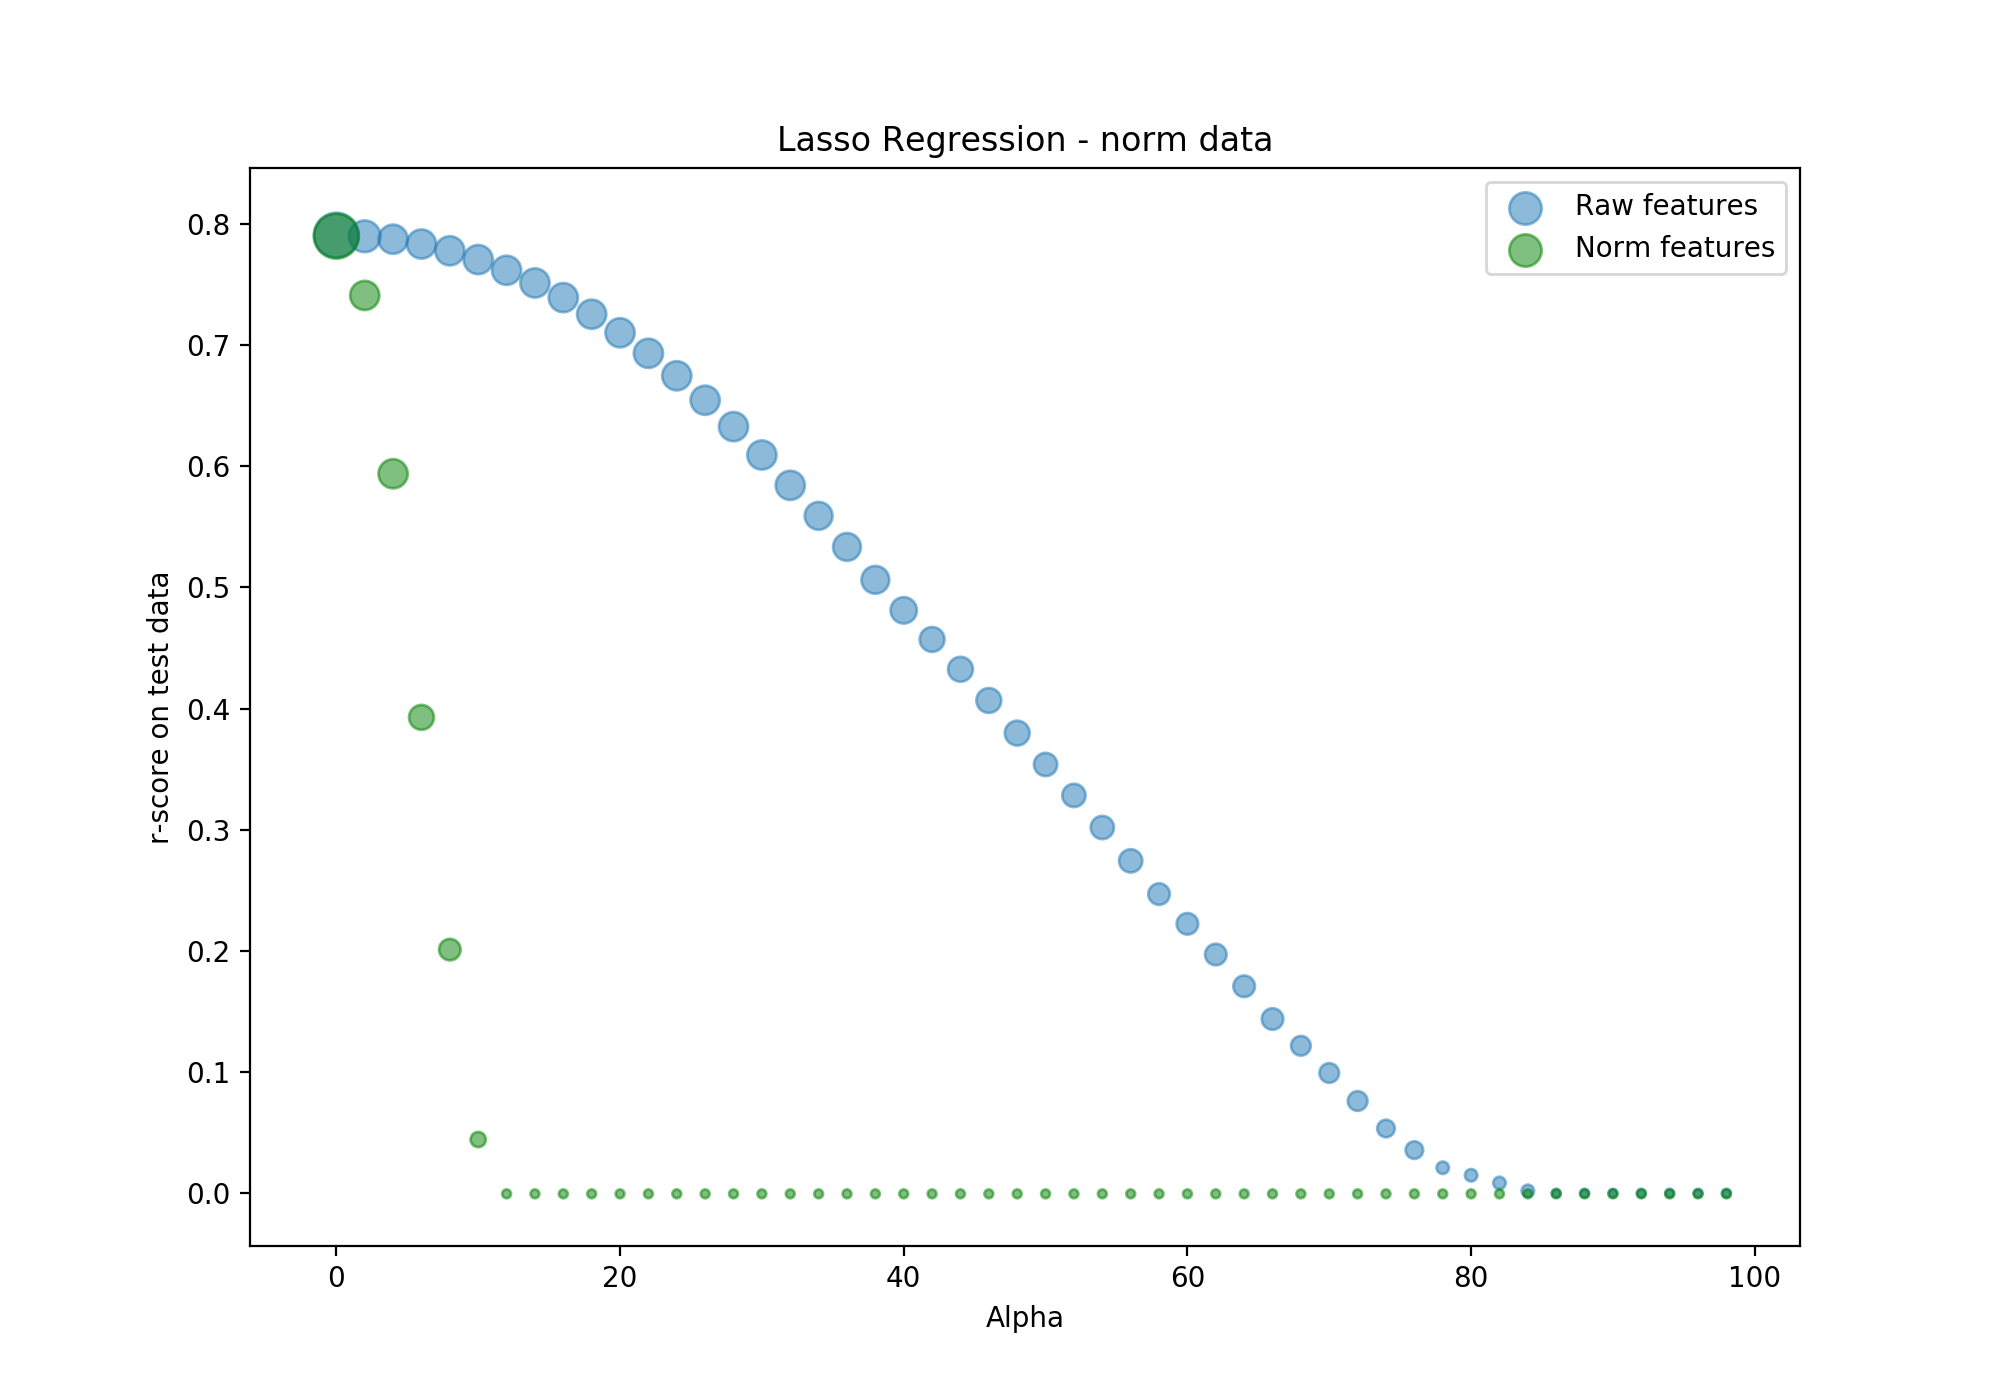

In [581]:
# Effect of alpha on raw v/s norm features
f=plt.figure(figsize=(10,7))
axs=plt.gca()
sizes=[f*10 for f in retained_features]
axs.scatter(alphas ,scores, s=sizes, alpha=0.5, label="Raw features")
axs.set_xlabel("Alpha")
axs.set_ylabel("r-score on test data")
axs.set_title("Lasso Regression - norm data")
sizesN=[f*10 for f in retained_featuresN]
axs.scatter(alphas ,scoresN, s=sizesN, alpha=0.5, color="green", label="Norm features")
axs.legend()
plt.show()
# NOTE: In general the R-score does not always decrease with increase in alpha as might be implied from plot below.

### Polynomial Regression

In [12]:
from sklearn.preprocessing import PolynomialFeatures

In [600]:
ploy=PolynomialFeatures(degree=2, #[a,b] becomes [1, a,b, ab, a**2, b**2]
                        interaction_only=False, #features having no interaction are skipped, like a**2, b**3 etc
                        include_bias=True #feature of all 1
                       )

#### choice of polynomial features

In [613]:
a=[x for x in poly._combinations(n_features=3,degree=2,interaction_only=False,include_bias=True)]
b=[x for x in poly._combinations(3,2,False,False)]
c=[x for x in poly._combinations(3,2,True,True)]

def mapper(key): return {0:"x0", 1:"x1", 2:"x2"}[key]
print("Features: x0,x1,x2")
strs=["All combinations with bias:", "All combinations without bias:", "Feature Interaction combination with bias:"]
for st,x in zip(strs, [a,b,c]):
    print(st,[' * '.join(map(mapper, tup)) for tup in x])

Features: x0,x1,x2
All combinations with bias: ['', 'x0', 'x1', 'x2', 'x0 * x0', 'x0 * x1', 'x0 * x2', 'x1 * x1', 'x1 * x2', 'x2 * x2']
All combinations without bias: ['x0', 'x1', 'x2', 'x0 * x0', 'x0 * x1', 'x0 * x2', 'x1 * x1', 'x1 * x2', 'x2 * x2']
Feature Interaction combination with bias: ['', 'x0', 'x1', 'x2', 'x0 * x1', 'x0 * x2', 'x1 * x2']


In [614]:
d=[x for x in poly._combinations(n_features=3,degree=3,interaction_only=False,include_bias=True)]
e=[x for x in poly._combinations(3,3,False,False)]
f=[x for x in poly._combinations(3,3,True,True)]
def mapper(key): return {0:"x0", 1:"x1", 2:"x2", 3:"x3"}[key]
print("Features: x0,x1,x2,x3")
strs=["All combinations with bias:", "All combinations without bias:", "Feature Interaction combination with bias:"]
for st,x in zip(strs, [d,e,f]):
    print(st,[' * '.join(map(mapper, tup)) for tup in x])

Features: x0,x1,x2,x3
All combinations with bias: ['', 'x0', 'x1', 'x2', 'x0 * x0', 'x0 * x1', 'x0 * x2', 'x1 * x1', 'x1 * x2', 'x2 * x2', 'x0 * x0 * x0', 'x0 * x0 * x1', 'x0 * x0 * x2', 'x0 * x1 * x1', 'x0 * x1 * x2', 'x0 * x2 * x2', 'x1 * x1 * x1', 'x1 * x1 * x2', 'x1 * x2 * x2', 'x2 * x2 * x2']
All combinations without bias: ['x0', 'x1', 'x2', 'x0 * x0', 'x0 * x1', 'x0 * x2', 'x1 * x1', 'x1 * x2', 'x2 * x2', 'x0 * x0 * x0', 'x0 * x0 * x1', 'x0 * x0 * x2', 'x0 * x1 * x1', 'x0 * x1 * x2', 'x0 * x2 * x2', 'x1 * x1 * x1', 'x1 * x1 * x2', 'x1 * x2 * x2', 'x2 * x2 * x2']
Feature Interaction combination with bias: ['', 'x0', 'x1', 'x2', 'x0 * x1', 'x0 * x2', 'x1 * x2', 'x0 * x1 * x2']


#### Linear and Ploynomail regression

In [11]:
# Linear Regression (OLS)
X,y,ceof=datasets.make_regression(n_samples=10000, n_features=17, noise=25, bias=53, coef=True, random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75)

lr=LinearRegression(fit_intercept=True).fit(X_train, y_train)
lr_tr_score=lr.score(X_train, y_train)
lr_te_score=lr.score(X_test, y_test)
print("Train r-score: {:.2f}, Test r-score: {:.2f}, {}".format(lr_tr_score, lr_te_score,
                                                               "UNDERFIT" if lr_tr_score<=lr_te_score else "OVERFIT"))

Train r-score: 0.99, Test r-score: 0.99, UNDERFIT


/anaconda/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [12]:
# Polynomial Regression (degree=3)
X,y,ceof=datasets.make_regression(n_samples=10000, n_features=17, noise=25, bias=53, coef=True, random_state=42)

#poly features
poly=PolynomialFeatures(degree=3, interaction_only=True) #better with only interacting features combinations
X=poly.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75)

pr=LinearRegression(fit_intercept=True).fit(X_train, y_train)
pr_tr_score=pr.score(X_train, y_train)
pr_te_score=pr.score(X_test, y_test)
print("Train r-score: {:.2f}, Test r-score: {:.2f}, {}".format(pr_tr_score, pr_te_score,
                                                          "UNDERFIT" if pr_tr_score<pr_te_score else "OVERFIT"))

Train r-score: 0.99, Test r-score: 0.98, OVERFIT


### Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

In [15]:
X,y=datasets.make_classification(n_samples=10000,
                                n_features=25,
                                random_state=42)
X_train,X_test, y_train,y_test=train_test_split(X,y, train_size=0.75)

In [22]:
# Logistic Regression
LogisticRegression(penalty="l2", #{"l1", "l2"} penalty for regularization
                        C=1.0, # inverse of regularization parameter, alpha
                        fit_intercept=True,
                        multi_class="ovr", #{"ovr", "multinomial"}; ovr (one-vs-rest) fits n binary classifier, "multinomial" biuilds one
                        solver="liblinear",#other solvers {"newton-cg", "lbfgs", "liblinear", "sag"}
                        max_iter=1000,
                        random_state=42
                       )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
logr=LogisticRegression(C=1.0).fit(X_train, y_train)
tr_score=logr.score(X_train, y_train)
te_score=logr.score(X_test, y_test)
print("Train r-score: {:.2f}, Test r-score: {:.2f}".format(tr_score, te_score))

Train r-score: 0.89, Test r-score: 0.88


### Linear SVM (Support Vector Machines)

In [14]:
from sklearn.svm import SVC #Suppport Vector Classifer

In [67]:
SVC(C=1.0, #(alpha**-1)
    kernel="rbf", #{"linear", "rbf","sigmoid", "poly", callable}
    degree=3, gamma="auto", coef0=0.0, #parameters for different kernels
    decision_function_shape="ovo", #{"ovo", "ovr"} #one-vs-one or one-vs-rest
    probability=False, #return class probabilities
    max_iter=1000,
    random_state=42)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=1000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [53]:
lsvc=SVC(kernel="linear").fit(X_train, y_train)
tr_score=lsvc.score(X_train, y_train)
te_score=lsvc.score(X_test, y_test)
print("Train r-score: {:.2f}, Test r-score: {:.2f}".format(tr_score, te_score))

Train r-score: 0.89, Test r-score: 0.88


In [54]:
lsvc.coef_

array([[-0.01201064,  0.03880538, -0.02488197, -0.02903932,  0.01141847,
        -0.01825962,  0.00839972, -0.05020523,  0.00939137,  0.02606261,
         0.8335992 , -0.02642474, -0.00618795, -0.04564123, -0.03786171,
         0.03074169,  0.46415805, -0.41826258, -0.04321272,  0.00167611,
        -0.0187671 ,  0.02720007, -0.00115252, -0.0182042 ,  1.0733917 ]])

#### multi-class classification

In [57]:
X,y=datasets.make_classification(n_samples=10000,
                                n_features=25,
                                 n_classes=4,
                                 n_clusters_per_class=1,
                                random_state=42)
X_train,X_test, y_train,y_test=train_test_split(X,y, train_size=0.75)

In [58]:
lsvc=SVC(kernel="linear").fit(X_train, y_train) # 6 one-vs-rest classifiers are trained
tr_score=lsvc.score(X_train, y_train)
te_score=lsvc.score(X_test, y_test)
print("Train r-score: {:.2f}, Test r-score: {:.2f}".format(tr_score, te_score))

Train r-score: 0.89, Test r-score: 0.89


In [69]:
lsvc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [64]:
lsvc.coef_ # 6 one-vs-rest classifiers are trained

array([[  1.83940023e-02,  -4.71850452e-02,  -1.33462321e-02,
          2.38041667e-02,  -1.62123924e-02,  -7.09296795e-03,
          2.67809338e-02,   3.15448479e-02,   2.10457275e-02,
         -2.17881560e-02,  -6.59623358e-01,  -5.21057182e-02,
          2.32493273e-02,   1.58609363e-02,   3.38474332e-02,
         -7.36012196e-03,  -1.18303664e+00,   8.65721915e-01,
          4.75031741e-02,   4.31035998e-03,  -1.46078860e-02,
         -3.62244590e-03,  -4.88837867e-03,  -1.73661887e-03,
         -1.15050127e+00],
       [  5.10491169e-03,  -2.55583700e-02,  -3.05785587e-02,
         -3.91434105e-03,   3.91348629e-03,   1.04824613e-02,
          3.28775379e-02,   4.42935301e-04,  -2.83202079e-03,
          1.59632794e-02,   3.94076422e-01,   2.20871225e-02,
          4.77444624e-02,  -2.85878353e-02,  -8.59715040e-03,
         -5.47768015e-02,  -1.84675038e+00,   1.15672051e+00,
          6.56620114e-02,   2.07150881e-02,  -5.75248154e-02,
          1.21210240e-02,   5.26593038e-02,

### Kernel SVM (Support Vector Machine)

#### RBF (Radial Basis Function)

In [82]:
# RBF kernel
#Using the data earlier
SVC(kernel="rbf",
   gamma="auto", #1/n_features if "auto", model-complexity relation equivalent to alpha
   )
rbfsvm=SVC(kernel="rbf").fit(X_train, y_train)
tr_score=rbfsvm.score(X_train, y_train)
te_score=rbfsvm.score(X_test, y_test)
print("Train r-score: {:.2f}, Test r-score: {:.2f}".format(tr_score, te_score))

Train r-score: 0.92, Test r-score: 0.88


In [85]:
# RBF kernel, with normalized data
#Using the data earlier
scaler=MinMaxScaler().fit(X_train)
X_train,X_test=scaler.transform(X_train), scaler.transform(X_test)
SVC(kernel="rbf",
   gamma="auto", #1/n_features if "auto", model-complexity relation equivalent to alpha
   )
rbfsvm=SVC(kernel="rbf").fit(X_train, y_train)
tr_score=rbfsvm.score(X_train, y_train)
te_score=rbfsvm.score(X_test, y_test)
print("Train r-score: {:.2f}, Test r-score: {:.2f}".format(tr_score, te_score)) #no much gain

Train r-score: 0.87, Test r-score: 0.87


In [94]:
# RBF kernel, with normalized data
#Using the data earlier
scaler=MinMaxScaler().fit(X_train)
X_train,X_test=scaler.transform(X_train), scaler.transform(X_test)
SVC(kernel="rbf",
   gamma="auto", #1/n_features if "auto", model-complexity relation equivalent to alpha
   )
rbfsvm=SVC(kernel="rbf", C=1, gamma=1).fit(X_train, y_train)
tr_score=rbfsvm.score(X_train, y_train)
te_score=rbfsvm.score(X_test, y_test)
print("Train r-score: {:.2f}, Test r-score: {:.2f}".format(tr_score, te_score)) #no much gain

Train r-score: 0.90, Test r-score: 0.89


In [98]:
# Tuning C,gamma (typically both are tuned together)
#Using the data earlier
scaler=MinMaxScaler().fit(X_train)
X_train,X_test=scaler.transform(X_train), scaler.transform(X_test)
SVC(kernel="rbf",
   gamma="auto", #1/n_features if "auto", model-complexity relation inverse to alpha
   )
rbfsvm=SVC(kernel="rbf", C=1, gamma=1).fit(X_train, y_train)
tr_score=rbfsvm.score(X_train, y_train)
te_score=rbfsvm.score(X_test, y_test)
print("Train r-score: {:.2f}, Test r-score: {:.2f}".format(tr_score, te_score))

Train r-score: 0.90, Test r-score: 0.89


In [129]:
# Effect of C,Gamma on model fit
Cs=[0.1, 0.5,1,2,5,10,20,50,100,1000,10000]
gammas=[0.001,0.001,0.01,0.1,1,2,5,10,100,1000,10000]
#using the scaled data above
train_scores=np.zeros((11,11))
test_scores=np.zeros((11,11))
for i,C in enumerate(Cs):
    print(i+1)
    for j,gamma in enumerate(gammas):
        rbfk=SVC(kernel="rbf", C=C, gamma=gamma).fit(X_train, y_train)
        tr_score=rbfk.score(X_train, y_train)
        te_score=rbfk.score(X_test, y_test)
        train_scores[i,j]=tr_score
        test_scores[i,j]=te_score

1
2
3
4
5
6
7
8
9
10
11


<IPython.core.display.Javascript object>


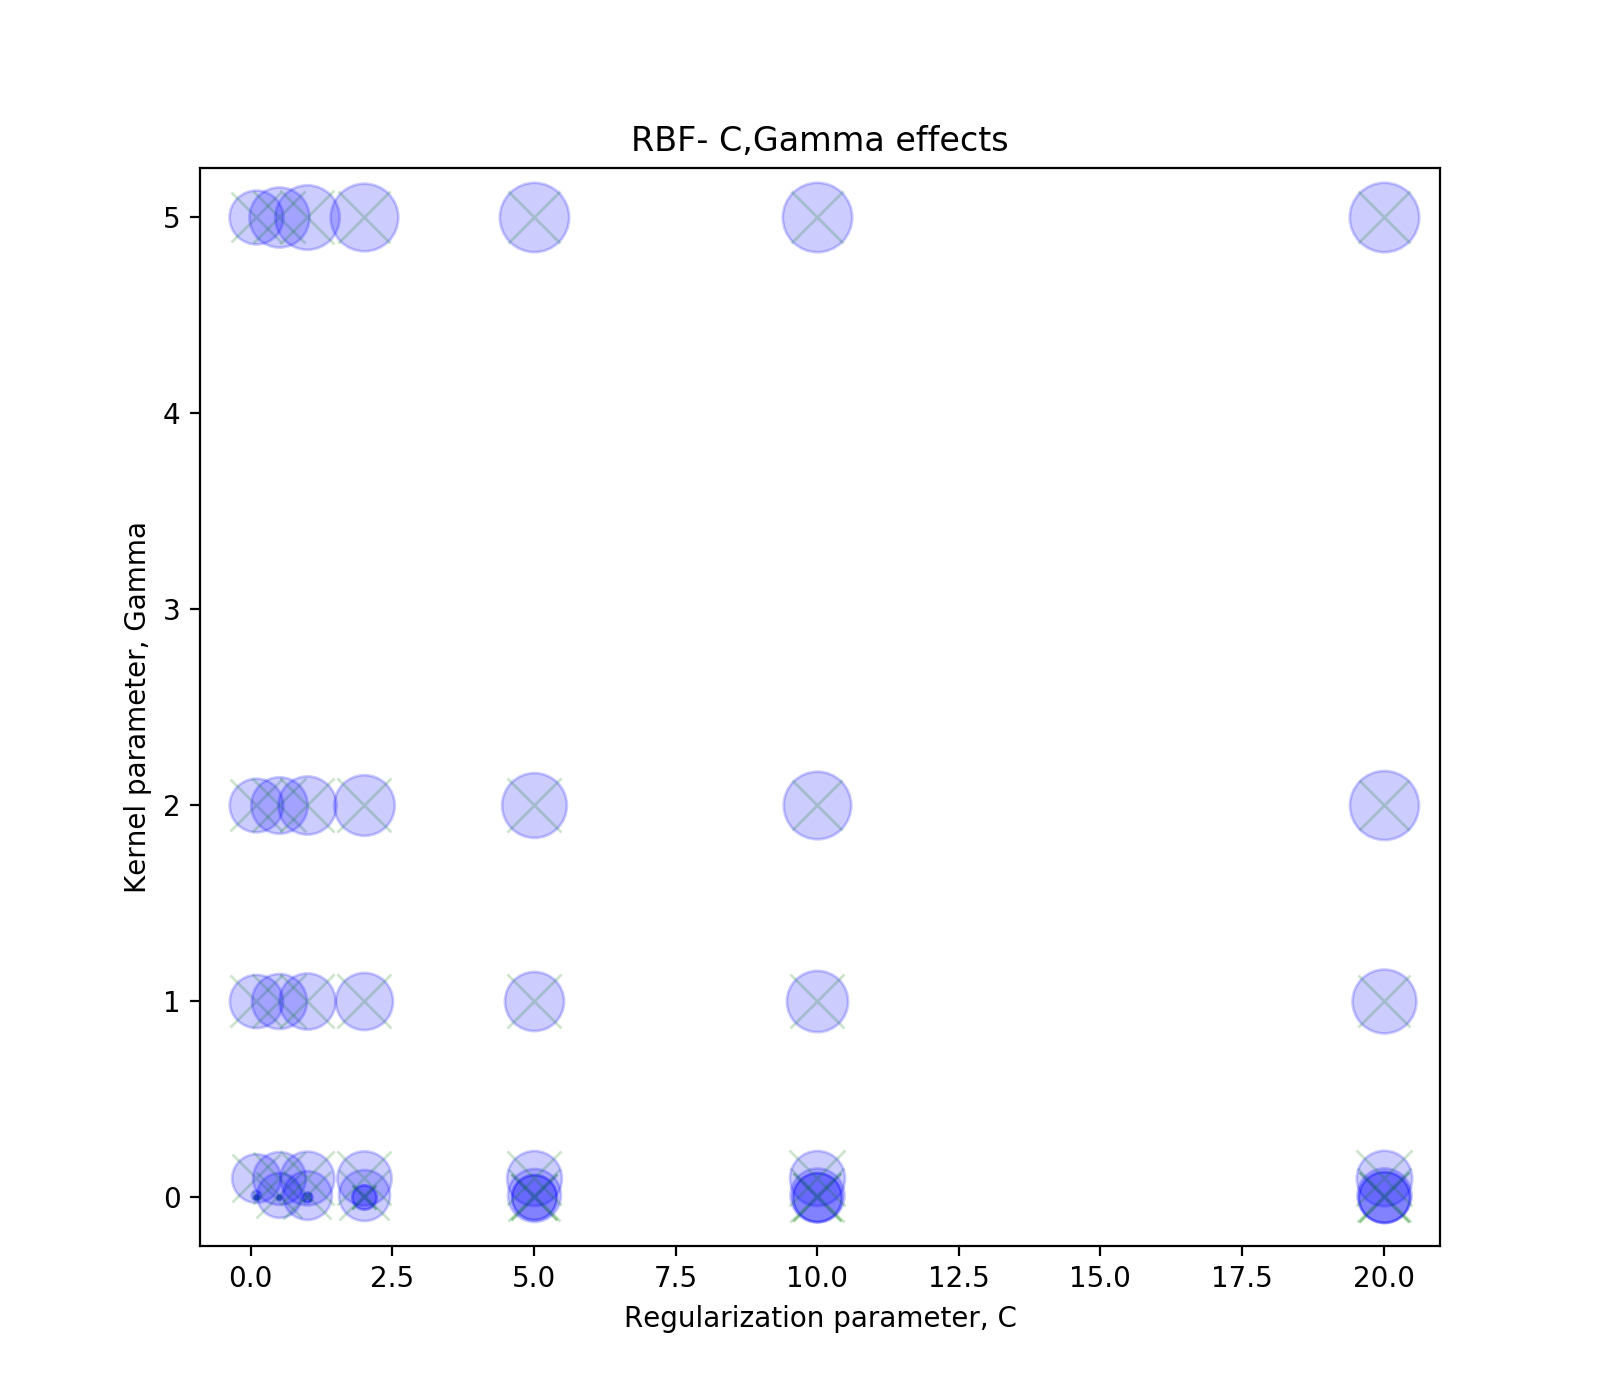

In [164]:

f=plt.figure(figsize=(8,7))
axs=plt.gca()
#np.dot(np.array(Cs).reshape(-1,1),np.array(gammas).reshape(1,-1))
train_sizes=(5*train_scores)**2
test_sizes=(5*test_scores)**2
for i,C in enumerate(Cs[:7]):
    for j,gamma in enumerate(gammas[:7]):
        axs.plot(C,gamma, 'o', color="blue",
                    markersize=train_sizes[i,j], 
                    alpha=0.2)
        axs.plot(C,gamma, 'x', color="green", markersize=test_sizes[i,j], alpha=0.2)
axs.set_xlabel("Regularization parameter, C")
axs.set_ylabel("Kernel parameter, Gamma")
axs.set_title("RBF- C,Gamma effects")
plt.show()

#### poly (polynomial kernel)

In [96]:
# polynomial kernel
#Using the data earlier
SVC(kernel="ploy",
   gamma="auto", #1/n_features if "auto", model-complexity relation inverse to alpha
    degree=2, #degree of kernel function
   )
polysvm=SVC(kernel="poly", degree=4).fit(X_train, y_train)
tr_score=polysvm.score(X_train, y_train)
te_score=polysvm.score(X_test, y_test)
print("Train r-score: {:.2f}, Test r-score: {:.2f}".format(tr_score, te_score))

Train r-score: 0.47, Test r-score: 0.47


### Cross Validation (k-fold CV)

In [134]:
# K-fold cross validation

In [15]:
from sklearn.model_selection import cross_val_score

In [142]:
X,y=datasets.make_classification(n_samples=10000,
                                n_features=25,
                                 n_classes=4,
                                 n_clusters_per_class=1,
                                random_state=42)
X_train,X_test, y_train,y_test=train_test_split(X,y, train_size=0.75)

In [144]:
model=SVC(kernel="rbf", C=1, gamma=1).fit(X_train, y_train)

In [149]:
cross_val_score(model, X,y,cv=3, #number of cross folds
                        );

In [148]:
cv_scores=cross_val_score(model, X,y,cv=5)
print(cv_scores)

[ 0.25124875  0.252       0.251       0.2505      0.25125125]


### Testing the effect of change of parameter

In [17]:
from sklearn.model_selection import validation_curve

In [162]:
# NOTE: CV is used to evaluate a model, not learn or tune a model

In [158]:
# validation_score
validation_curve(SVC(kernel="rbf", gamma=1),X,y,
                param_name="C", #parameter name of input model
                param_range=[0.1, 0.5,1,2,5,10,20,50,100,1000,10000], #range of values for parameter to test
                cv=3 #number of folds
                ); #returns (train scores, test scores); each of size len(param_range) x cv_folds

KeyboardInterrupt: 

In [159]:
X,y=datasets.make_classification(n_samples=10000,
                                n_features=25,
                                 n_classes=4,
                                 n_clusters_per_class=1,
                                random_state=42)
X_train,X_test, y_train,y_test=train_test_split(X,y, train_size=0.75)

In [161]:
Cs=[0.1, 0.5,1,2,5,10,20,50,100,1000,10000]
scores=validation_curve(SVC(kernel="rbf", gamma=1), X,y,
                param_name="C",
                param_range=Cs,
                cv=5)

<IPython.core.display.Javascript object>


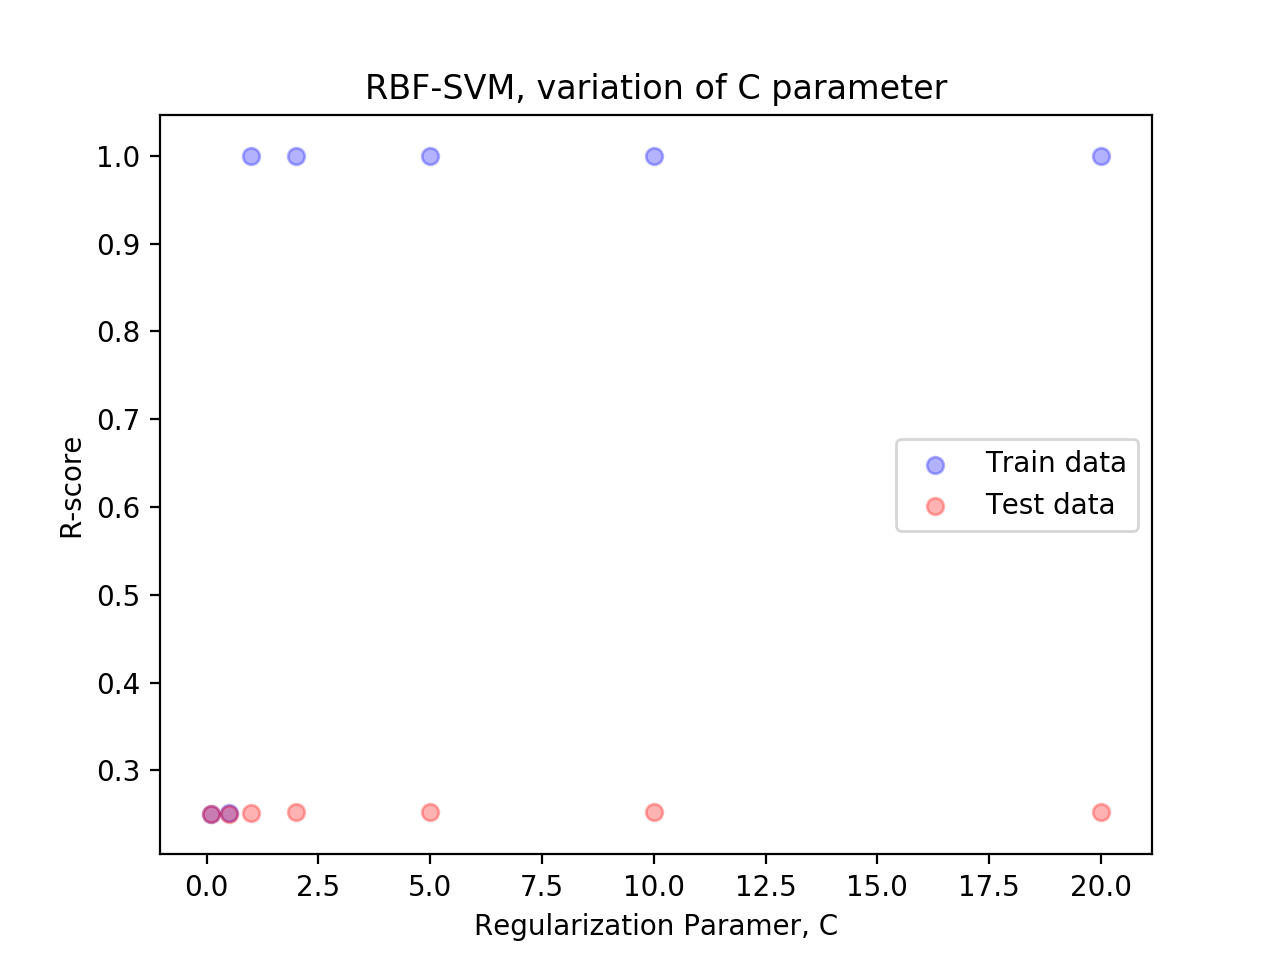

In [188]:
train_s,test_s=scores
f=plt.figure()
axs=plt.gca()
axs.scatter(Cs[:7], np.mean(train_s[:7,:], axis=1), color="blue", marker='o', alpha=0.3, label="Train data")
axs.scatter(Cs[:7], np.mean(test_s[:7,:], axis=1), color="red", marker='o', alpha=0.3, label="Test data")
axs.legend()
axs.set_xlabel("Regularization Paramer, C")
axs.set_ylabel("R-score")
axs.set_title("RBF-SVM, variation of C parameter")
plt.show()
plt.show()

### Decision Trees

In [16]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [196]:
iris=load_iris()
#all sklearn dataset objects have attributes:
#        "data", features of data 
#        "target", y values
#       "feature_names"
#        "target_names"

In [198]:
X,y=iris.data,iris.target
X_train,X_test, y_train,y_test=train_test_split(X,y,train_size=0.75)

In [199]:
dt=DecisionTreeClassifier?

In [258]:
# Decision Tree
DecisionTreeClassifier(criterion="gini", #{"gini", "entropy"} for "Gini Impurity" or "Information Gain"
                          max_depth=None, #maximum depth of decision tree
                       max_leaf_nodes=None, #max number of leaves
                       min_samples_leaf=1, #minimum number of samples required to split a node
                         random_state=42);

In [209]:
dt=DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
mdl=dt
tr_score=mdl.score(X_train, y_train)
te_score=mdl.score(X_test, y_test)
print("Train r-score: {:.2f}, Test r-score: {:.2f}".format(tr_score, te_score))

Train r-score: 1.00, Test r-score: 0.97


In [208]:
# Control for overfitting by limiting depth of the tree
dt2=DecisionTreeClassifier(max_depth=3,random_state=42).fit(X_train, y_train)
mdl=dt2
tr_score=mdl.score(X_train, y_train)
te_score=mdl.score(X_test, y_test)
print("Train r-score: {:.2f}, Test r-score: {:.2f}".format(tr_score, te_score))

Train r-score: 0.96, Test r-score: 0.97


#### feature importances

In [226]:
# feature_importances_ attribute

In [225]:
sorted([(y//0.01/100,x) for x,y in zip(iris.feature_names, dt.feature_importances_)])[::-1]

[(0.55000000000000004, 'petal length (cm)'),
 (0.41999999999999998, 'petal width (cm)'),
 (0.01, 'sepal length (cm)'),
 (-0.0, 'sepal width (cm)')]

<IPython.core.display.Javascript object>


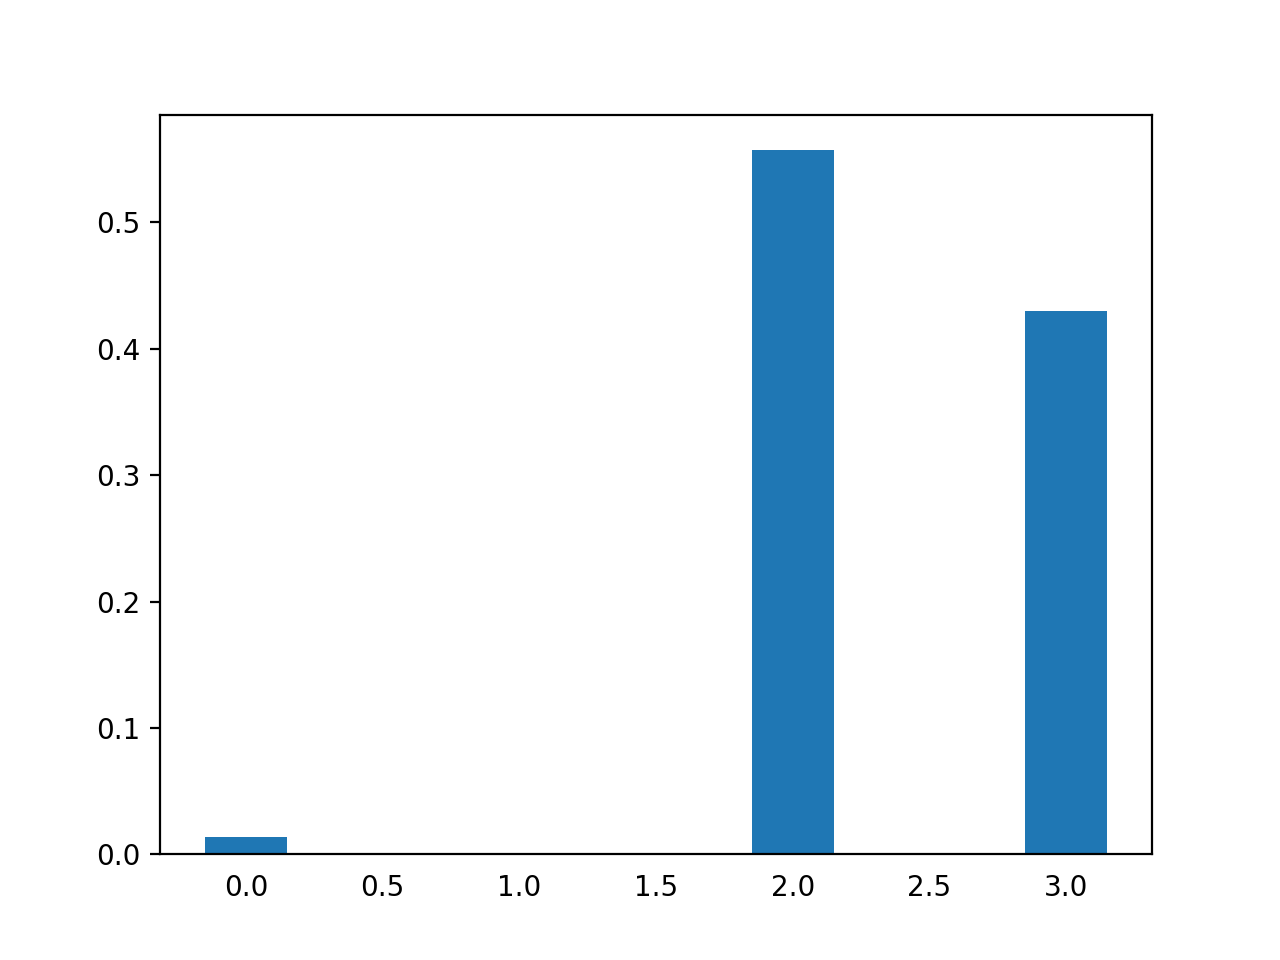

In [257]:
f=plt.figure()
axs=plt.gca()
axs.bar(range(4),height=dt.feature_importances_, width=0.3)#, xlabels=iris.feature_names)
axs.tick_params(axis="x", bottom="off", labelbottom="on")

In [18]:
np.bincount(np.random.randint(1,10, 50))

array([ 0,  7,  3,  5,  6,  1,  4,  9,  4, 11])

### Evaluation metrics

#### Acuracy metric for data with unbalanced classes

In [41]:
#create and model unbalanced class
X,y=datasets.make_classification(n_samples=10000,
                            n_features=20,
                                 n_informative=20,
                                 n_redundant=0,
                            n_classes=10,
                            n_clusters_per_class=1,
                            random_state=42
                                )
before=np.bincount(y)
y[y!=0]=1
after=np.bincount(y)
print("Class distribution:\nBefore: {}, After: {}".format(before, after))
X_train,X_test, y_train,y_test=train_test_split(X,y)

rbfk=SVC(kernel="rbf").fit(X_train,y_train)
svm_score=rbfk.score(X_test, y_test)

Class distribution:
Before: [1000  991 1000 1006 1002 1002  995 1000 1009  995], After: [1000 9000]


In [36]:
from sklearn.dummy import DummyClassifier

In [48]:
# fit dummy clasffier and compare with SVC model above
dc=DummyClassifier(strategy="most_frequent", random_state=42).fit(X_train, y_train)
dc_score=dc.score(X_test, y_test)
print("SVC accuracy: {}, Most Frequent class Dummy classifier accuracy: {}".format(svm_score, dc_score))
#Dummy classifier is almost as good as the SVC!

SVC accuracy: 0.9092, Most Frequent class Dummy classifier accuracy: 0.8996


#### Dummy Classifier/Regressor

In [50]:
# Dummy Classifier
# Classifier that makes prediction using simple rules(eg: "most_frequent", "uniform", "constant") on the output,
#ignoring the input! 
DummyClassifier(strategy="stratified", #{"stratified", "most_frequent", "uniform", "prior", "constant"}
                constant=1, #int/list predicted class value for "constant" strategy
                random_state=42
               ) #use as a regular classifier (.fit, .predict, .score)
#"stratified" -> random prediction based on distribution of classes in output
#"uniform"  -> picks a random class uniformly

DummyClassifier(constant=1, random_state=42, strategy='stratified')

In [52]:
from sklearn.dummy import DummyRegressor

In [57]:
# Dummy Regressor
# Regressor that makes prediction using simple rules(eg: "mean", "meadian", "constant") on the output,
#ignoring the input!
DummyRegressor(strategy="mean", #{"mean", "median", "quantile", "constant"}
               constant=1, #for the "constant" strategy
              )
# "mean" -> mean of all y values
# "median" -> y value of the middle training example
# "quantile" -> [0.0, 1.0], any percentile value as a float (0.95 for 95%ile, 0.0 for min)

DummyRegressor(constant=1, quantile=None, strategy='mean')

### Confusion Matrix

In [17]:
from sklearn.metrics import confusion_matrix

In [ ]:
# Confusion MAtrix
# confusion_matrix creates a k x k matrix
confusion_matrix(y_true, y_pred, labels=None)
# labels - used to select a subset of labels (specify subset of labels) or order the matrix labels 
#(if all are specified)

In [68]:
#using data for SVC above
y_pred=rbfk.predict(X_test)
confusion_matrix(y_test,y_pred)
#confusion_matrix(y_test,y_pred, labels=[1]) #single value

array([[  27,  224],
       [   3, 2246]])

### Evaluation metrics for binary classification

In [18]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [73]:
#using data for SVC above
y_pred=rbfk.predict(X_test)
acc=accuracy_score(y_test,y_pred)
rec=recall_score(y_test, y_pred)
prec=precision_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
print(" Accuracy: {:.2f}\n Recall: {:.2f}\n Precision: {:.2f}\n F1-score :{:.2f}".format(acc, rec, prec, f1))

 Accuracy: 0.91
 Recall: 1.00
 Precision: 0.91
 F1-score :0.95


In [19]:
from sklearn.metrics import classification_report

In [75]:
# classification summary
classification_report (y_true, y_pred,
                       labels=None, #subset of y-labels or ordering of labels (if all are specified)
                       target_names=None #dispaly names for labels
                       digits=2 #float percision
                      )

In [85]:
res=classification_report(y_test, rbfk.predict(X_test), target_names=["class 0", "class 1"], digits=3)
print("SVM report:\n", res)
# Not a good fit, low recall for class 0

SVM report:
              precision    recall  f1-score   support

    class 0      0.900     0.108     0.192       251
    class 1      0.909     0.999     0.952      2249

avg / total      0.908     0.909     0.876      2500



In [84]:
res2=classification_report(y_test, dc.predict(X_test), target_names=["class 0", "class 1"], digits=3)
print("Dummy classifier report:\n",res2)
# Has low precision and recall for class 0

Dummy classifier report:
              precision    recall  f1-score   support

    class 0      0.000     0.000     0.000       251
    class 1      0.900     1.000     0.947      2249

avg / total      0.809     0.900     0.852      2500



/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [97]:
rbfk2=SVC(kernel="rbf", C=20).fit(X_train,y_train)
res=classification_report(y_test, rbfk2.predict(X_test), target_names=["class 0", "class 1"], digits=3)
print("SVM report, (C=20):\n", res)
# Better than SVM-RBF (with C=1) before

SVM report, (C=20):
              precision    recall  f1-score   support

    class 0      0.918     0.179     0.300       251
    class 1      0.916     0.998     0.955      2249

avg / total      0.916     0.916     0.890      2500



In [285]:
# precision-recall curve

In [20]:
from sklearn.metrics import precision_recall_curve

In [ ]:
precision_recall_curve(y_test, probability_predictions_for_y)
# returns (precision_values, recall_values, thresholds)

In [21]:
X,y=datasets.make_classification(n_samples=10000,
                                 n_features=20,
                                 n_informative=20,
                                 n_repeated=0,
                                 n_redundant=0,
                                   n_classes=2,
                                n_clusters_per_class=1,
                                random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X,y, train_size=0.75)
lr=LogisticRegression(C=100).fit(X_train, y_train)
y_proba=lr.predict_proba(X_test)[:,1] #the positive class
precisions,recalls, thresholds=precision_recall_curve(y_test, y_proba)

<IPython.core.display.Javascript object>


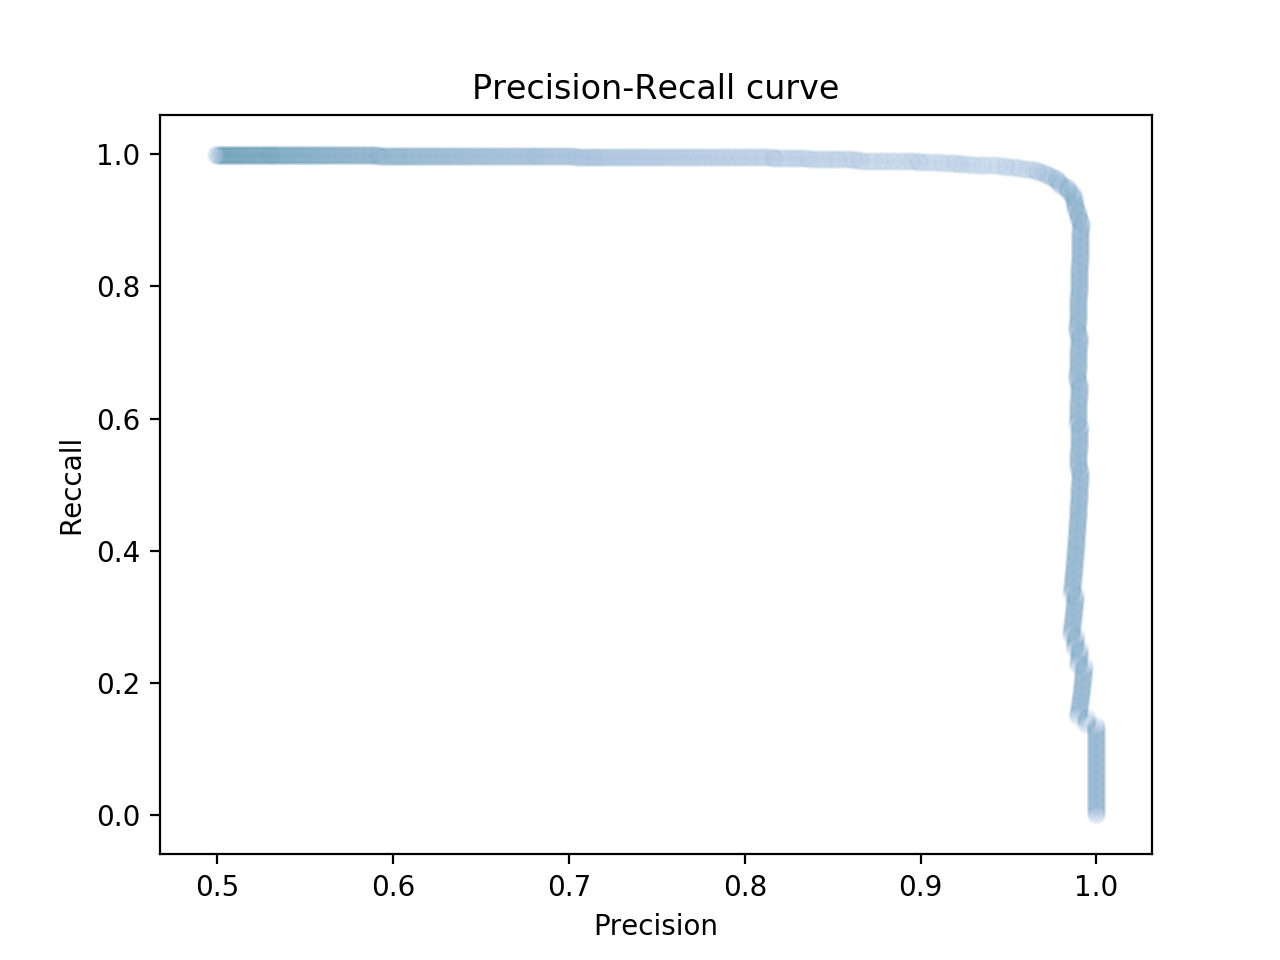

In [24]:
f=plt.figure()
axs=plt.gca()
axs.scatter(precisions, recalls, alpha=0.01)
axs.set_xlabel("Precision")
axs.set_ylabel("Reccall")
axs.set_title("Precision-Recall curve")
plt.show()

In [25]:
# ROC curve

In [21]:
from sklearn.metrics import roc_curve

In [27]:
# roc_curve
roc_curve(y_true, y_prob_prediction_for_positive_class)
# returns (false positive rates, true prositive rates, thresholds)

In [29]:
X,y=datasets.make_classification(n_samples=10000,
                                 n_features=20,
                                 n_informative=20,
                                 n_repeated=0,
                                 n_redundant=0,
                                   n_classes=2,
                                n_clusters_per_class=1,
                                random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X,y, train_size=0.75)
lr=LogisticRegression(C=100).fit(X_train, y_train)
y_proba=lr.predict_proba(X_test)[:,1] #the positive class
tprs,fprs,thresholds=roc_curve(y_test, y_proba)

<IPython.core.display.Javascript object>


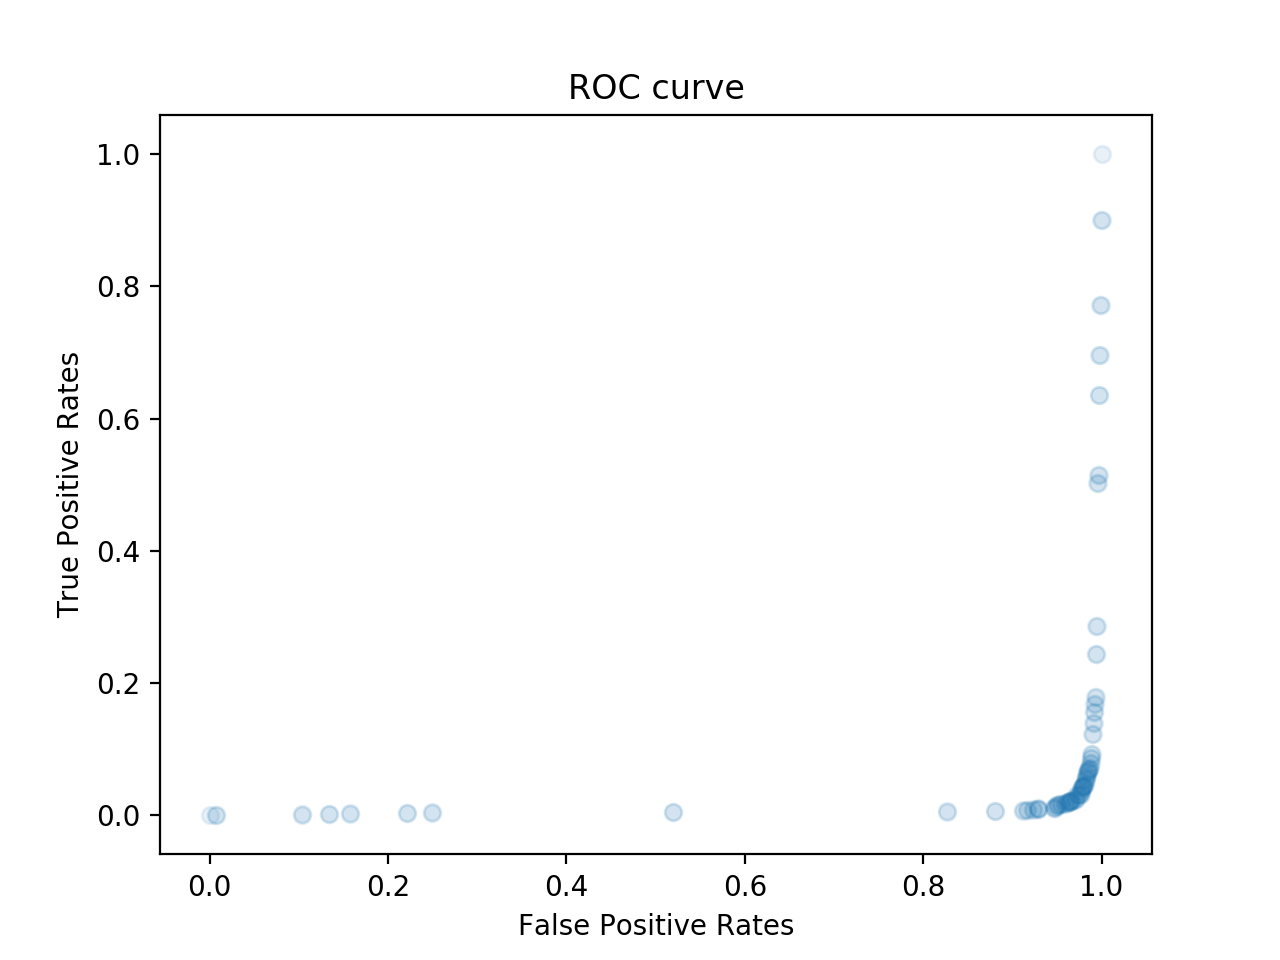

In [34]:
# Wrong?
f=plt.figure()
axs=plt.gca()
axs.scatter(fprs,tprs, alpha=0.1)
axs.set_xlabel("False Positive Rates")
axs.set_ylabel("True Positive Rates")
axs.set_title("ROC curve")
plt.show()

#### Decision Functions

In [213]:
#Decision function score of a sample is the signed distance of the sample from the hyperplane

X,y=datasets.make_classification(n_samples=10000,
                                 n_features=20,
                                 n_informative=20,
                                 n_repeated=0,
                                 n_redundant=0,
                                   n_classes=2,
                                n_clusters_per_class=1,
                                random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X,y, train_size=0.75)
lr=LogisticRegression(C=100).fit(X_train, y_train)
dec_scores=lr.decision_function(X_test) #confidence score for a class
y_pred=lr.predict(X_test)
print("Decision scores: (actual, predicted, decision_score)")
wrongs=[(x,y,z) for x,y,z in zip(y_test,y_pred,dec_scores) if x!=y][:2]
rights=[(x,y,z) for x,y,z in zip(y_test,y_pred,dec_scores) if x==y][:3]
print(rights+wrongs) # Mix of right and wrong predictions
# Setting different thresholds for classification and plotting the precision recall values for each threshold gives
#the precision recall curve

Decision scores: (actual, predicted, decision_score)
[(1, 1, 7.0963745900785264), (0, 0, -10.084193996832871), (1, 1, 3.6057704888421069), (0, 1, 1.5698452627475159), (0, 1, 0.59013918411507493)]


#### predict probabilites

In [210]:
X,y=datasets.make_classification(n_samples=10000,
                                 n_features=20,
                                 n_informative=20,
                                 n_repeated=0,
                                 n_redundant=0,
                                   n_classes=11,
                                n_clusters_per_class=1,
                                random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X,y, train_size=0.75)

In [211]:
#one-vs-all LR
lr=(LogisticRegression().fit(X_train, y_train))
dec_scores=lr.decision_function(X_test) #confidence score for a class
probs=lr.predict_proba(X_test)
print(probs[0].shape) # =11; 55 one-vs-rest models 

(11,)


In [212]:
# lr with one multiclass-model
lr2=(LogisticRegression(solver="lbfgs", multi_class="multinomial").fit(X_train, y_train))
dec_scores2=lr.decision_function(X_test) #confidence score for a class
probs2=lr2.predict_proba(X_test)
print(probs2[0].shape) # =11; 11 classes, 1 nulti-class model

(11,)


### Evaluation metrics for multi-class classification

In [219]:
# confusion matrix

In [218]:
#multi-class data
X,y=datasets.make_classification(n_samples=10000,
                                 n_features=20,
                                 n_informative=20,
                                 n_repeated=0,
                                 n_redundant=0,
                                   n_classes=11,
                                n_clusters_per_class=1,
                                random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X,y, train_size=0.75)
lr=(LogisticRegression().fit(X_train, y_train))
confusion_matrix(y_test, lr.predict(X_test)) # 11 x 11 matrix

array([[ 95,  16,   9,  14,  23,  23,  11,   7,  22,   8,   6],
       [  5, 131,   6,   8,   7,   5,   7,  28,   6,  17,  12],
       [  3,   1, 124,  15,   0,   2,  10,  13,  20,  26,  24],
       [ 12,   5,  15, 116,  17,  14,   8,   3,  12,  13,  13],
       [ 14,   8,   2,  13, 126,   8,   7,  13,  11,   0,   8],
       [ 21,   5,  10,  13,  13, 110,   1,   3,  25,   5,  14],
       [  4,  20,   3,   6,  18,   0, 141,  27,   7,  11,   2],
       [  3,   5,  12,   8,   6,   4,  12, 161,   6,   1,  11],
       [ 12,   5,  10,  21,  27,  21,   8,   4,  92,   7,   6],
       [  8,  25,   3,   2,   4,   3,  17,   9,   2, 135,   9],
       [  7,  11,  21,  12,  15,  12,   8,  10,   2,   3, 139]])

In [220]:
c_rep=classification_report(y_test, lr.predict(X_test))
print(c_rep)

             precision    recall  f1-score   support

          0       0.52      0.41      0.45       234
          1       0.56      0.56      0.56       232
          2       0.58      0.52      0.55       238
          3       0.51      0.51      0.51       228
          4       0.49      0.60      0.54       210
          5       0.54      0.50      0.52       220
          6       0.61      0.59      0.60       239
          7       0.58      0.70      0.64       229
          8       0.45      0.43      0.44       213
          9       0.60      0.62      0.61       217
         10       0.57      0.58      0.57       240

avg / total       0.55      0.55      0.55      2500



In [225]:
# micro and macro average precision scores

In [229]:
#precision_score(y_test, lr.predict(X_test), average="binary") # applicable for binary class, "binary" is the default
micro=precision_score(y_test, lr.predict(X_test), average="micro")
macro=precision_score(y_test, lr.predict(X_test), average="macro")
print("Macro average precision: {:.3f}\n Micro average percision: {:.3f}".format(macro, micro))

Macro average precision: 0.546
 Micro average percision: 0.548


### Regression evaluation metrics

In [246]:
# regression data
X,y=datasets.make_regression(n_samples=10000,
                            n_features=25,
                             noise=20,
                            random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X,y, train_size=0.75)
lm=LinearRegression().fit(X_train, y_train)

In [247]:
from sklearn.metrics import (r2_score, mean_absolute_error, mean_squared_error, median_absolute_error)

In [230]:
# R**2 (r2_score)

In [256]:
r2=r2_score(y_test, y_pred)
print(" R**2- score of Linear model: {:.3f}".format(r2))
dm=DummyRegressor(strategy="mean").fit(X_train, y_train)
dm_ypred=dm.predict(X_test)
r2d=r2_score(y_test, dm_ypred)
print(" R**2- score of dummy regressor: {:.3f}".format(r2d)) # =1, as it always gives a constant prediction (mean value)

 R**2- score of Linear model: 0.990
 R**2- score of dummy regressor: -0.000


In [257]:
# Mean absolute error, Mean squared error and Median absolute error

In [258]:
y_pred=lm.predict(X_test)
mnabs=mean_absolute_error(y_test, y_pred)
mnsqe=mean_squared_error(y_test, y_pred)
mdabs=median_absolute_error(y_test, y_pred)
print(" Mean absolute error: {:.3f}\n Mean squared error: {:.3f}\n Median absolute error: {:.3f}".format(mnabs,
                                                                                                         mnsqe,mdabs))

 Mean absolute error: 15.561
 Mean squared error: 383.887
 Median absolute error: 13.354


In [283]:
#dir(sklearn.metrics)

### Model selection using evaluation metrics

#### K-fold cross-validation

In [268]:
# Train data
digits=datasets.load_digits()
X,y=digits.data, digits.target==1
# model
svml=SVC(kernel="linear", C=1)
folds=5
cv_acc=cross_val_score(svml, X,y, scoring="accuracy", cv=folds) #"accuracy" is the defaulting scoring metric
cv_auc=cross_val_score(svml, X,y, scoring="roc_auc", cv=folds)
cv_rec=cross_val_score(svml, X,y, scoring="recall", cv=folds)
cv_prec=cross_val_score(svml, X,y, scoring="precision", cv=folds)
print(" {} fold CROSS VALIDATION".format(folds)) 
print(" CV (accuracy): {}\n CV (AUC): {}\n CV (recall): {}\n CV (precision): {}".format(cv_acc, cv_auc,
                                                                                        cv_rec, cv_prec))

 5 fold CROSS VALIDATION
 CV (accuracy): [ 0.91944444  0.98611111  0.97214485  0.97493036  0.96935933]
 CV (AUC): [ 0.9641871   0.9976571   0.99372205  0.99699002  0.98675611]
 CV (recall): [ 0.81081081  0.89189189  0.83333333  0.83333333  0.83333333]
 CV (precision): [ 0.57692308  0.97058824  0.88235294  0.90909091  0.85714286]


#### Grid Search

In [22]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# GridSearch finds the optimal value for parameter through exhaustive search, using Cross validation
grid_mdl=GridSearchCV(estimator,
                      param_grid=param_grid, #dict with param name as key and value is a list of possible values
                      cv=3, #number of folds for CV
                      scoring="accuracy", #{"accuracy", "recall", "roc_auc", "precision", ...}
                     )
# the returned instance has fit, predict, decision_function methods
# best_params_, best_score_ attributes can be used to obtain the best parameter values after performing all fits

In [276]:
# Train data
digits=datasets.load_digits()
X,y=digits.data, digits.target==1
X_train,X_test,y_train,y_test=train_test_split(X,y, train_size=0.75)
# model
rbf=SVC(kernel="rbf")
grid_values={"gamma":[1/1000, 1/100, 5/100, 1/10, 1, 10, 100]}

#Grid search optimizing for accuracy metric
grid_rbf_acc=GridSearchCV(rbf, param_grid=grid_values, cv=3) #scoring="accuracy" (default)
grid_rbf_acc.fit(X_train, y_train)
dec_acc=grid_rbf_acc.decision_function(X_test)
print("Grid Search best param value (accuracy): {}".format(grid_rbf_acc.best_params_))
print("Grid Search best score (accuracy): {:.3f}".format(grid_rbf_acc.best_score_))

#Grid search optimizing for AUC metric
grid_rbf_auc=GridSearchCV(rbf, param_grid=grid_values, cv=3, scoring="roc_auc")
grid_rbf_auc.fit(X_train, y_train)
dec_auc=grid_rbf_auc.decision_function(X_test)
print("Grid Search best param value (AUC): {}".format(grid_rbf_auc.best_params_))
print("Grid Search best score (AUC): {:.3f}".format(grid_rbf_auc.best_score_)) 

Grid Search best param value (accuracy): {'gamma': 0.001}
Grid Search best score (accuracy): 0.998
Grid Search best param value (AUC): {'gamma': 0.001}
Grid Search best score (AUC): 1.000


#### available evaluation metrics (values for scoring attribute)

In [23]:
from sklearn.metrics.scorer import SCORERS

In [282]:
[k for k in SCORERS.keys()]

['r2',
 'neg_median_absolute_error',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'median_absolute_error',
 'mean_absolute_error',
 'mean_squared_error',
 'accuracy',
 'roc_auc',
 'average_precision',
 'log_loss',
 'neg_log_loss',
 'adjusted_rand_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted']

### Naive Bayes Classifier

In [35]:
# Gaussian Naive Bayes classifier

In [24]:
from sklearn.naive_bayes import GaussianNB

In [51]:
X,y=datasets.make_classification(n_samples=10000,
                                n_features=12,
                                 n_informative=12,
                                 n_redundant=0,
                                n_classes=2,
                                n_clusters_per_class=1,
                                random_state=42)
X_train,X_test, y_train,y_test=train_test_split(X,y, train_size=0.75)

In [45]:
GaussianNB(priors=None, #prior probabilities for classes, optional
          )
# allows online fit for data trough parital_fit method

GaussianNB(priors=None)

In [52]:
gnb=GaussianNB().fit(X_train, y_train)
acc=gnb.score(X_test, y_test)
ypred=gnb.predict(X_test)
prec=precision_score(y_test, ypred)
rec=recall_score(y_test, ypred)
acc,prec,rec

(0.92759999999999998, 0.92403100775193803, 0.93490196078431376)

### Random forest (ensemble of decision trees)

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
X,y=datasets.make_classification(n_samples=10000,
                                n_features=24,
                                n_informative=24,
                                 n_redundant=0,
                                n_classes=10,
                                n_clusters_per_class=1,
                                random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X,y, train_size=0.75)

In [71]:
RandomForestClassifier(n_estimators=10, #number of decision trees in RF
                       max_features="auto", #int (exact count) /float (percent) of random features for each tree
                       max_depth=None, #maximim depth of tree
                       max_leaf_nodes=None, #maximum number of leaf nodes
                       min_samples_split=2, #minimum samples in a node to split it
                       bootstrap=True, #use bootstrap samples
                       n_jobs=1, #number of jobs to be run in parallel for train and predict, -1 = number of cores
                       random_state=42,
                      )
# Random forest - ensemble of decision trees
# similary for regression use RandomForestRegressor

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [69]:
rf=RandomForestClassifier(n_estimators=10).fit(X_train, y_train)
rf.score(X_test, y_test) #gets better with more trees

0.63280000000000003

In [70]:
# similary for regression use RandomForestRegressor

### Gradient Boosted Decision Trees (another ensemble od decision trees)

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

In [75]:
GradientBoostingClassifier(n_estimators=100, #number of boosting stages/ trees
                           learning_rate=0.1, #control the complexity of each tree/stage learner
                           max_features=None, #int (exact count) /float (percent) of random features for each tree
                           max_depth=3, #maximim depth of tree
                           max_leaf_nodes=None, #maximum number of leaf nodes
                           min_samples_split=2, #minimum samples in a node to split it
                           random_state=42
                          )

In [78]:
X,y=datasets.make_classification(n_samples=10000,
                                n_features=24,
                                n_informative=24,
                                 n_redundant=0,
                                n_classes=10,
                                n_clusters_per_class=1,
                                random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X,y, train_size=0.75)

In [84]:
gbt=GradientBoostingClassifier(n_estimators=100, learning_rate=0.01).fit(X_train, y_train)
# make less complex by reducing the learning rate and depth of trees
gbt.score(X_test, y_test)

0.54279999999999995

### Neural Network

In [ ]:
# MLPClassifier

In [27]:
from sklearn.neural_network import MLPClassifier

In [101]:
MLPClassifier(hidden_layer_sizes=(100,),# tuples of number of neurons in each hidden layer
              activation="relu", #activation function 
              solver="adam", #optimization algorithm
              alpha=0.0001, # L2 regularization parameter, like in Ridge Regression
              batch_size="auto", #for stochastic optimizers
              learning_rate="constant", # costant, invscaling or adaptive
              learning_rate_init=0.001, 
              max_iter=200,
              momentum=0.9, #momentum [0,1] for "sgd" solver
              nesterovs_momentum=True, #enable Nesterov momentum
              beta_1=0.9, beta_2=0.999,epsilon=1e-08, #parameters for "adam" solver
              shuffle=True, 
              random_state=42, #initial weights of neurons are init randomly
              )
# Multi-Layer Perceptron CLassifier

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [91]:
X,y=datasets.make_classification(n_samples=10000,
                                n_features=24,
                                n_informative=24,
                                 n_redundant=0,
                                n_classes=10,
                                n_clusters_per_class=1,
                                random_state=42
                                )
X_train,X_test,y_train,y_test=train_test_split(X,y, train_size=0.75)

In [93]:
nn=MLPClassifier(hidden_layer_sizes=[20,15], random_state=42).fit(X_train, y_train)

In [94]:
nn.score(X_test, y_test)

0.80200000000000005

In [96]:
# MLPRegressor

In [97]:
from sklearn.neural_network import MLPRegressor

In [98]:
MLPRegressor #takes same arguments as MLPClassifier

In [99]:
X,y=datasets.make_regression(n_samples=10000,
                                n_features=24,
                                noise=10,
                                random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X,y, train_size=0.75)

In [102]:
nn_r=MLPRegressor(hidden_layer_sizes=[20,15,5], random_state=42).fit(X_train, y_train)

In [104]:
nn_r.score(X_train, y_train),nn_r.score(X_test, y_test)

(0.99671163459941026, 0.99646286463503242)

### Label Encoder

In [105]:
# Used to normalize categorical values or map non-integer catergories to integer categories

In [28]:
from sklearn.preprocessing import LabelEncoder

In [107]:
LabelEncoder()
# encodes labels (numeric/non-numeric) to values [0,n_classes-1]
# original labels values are stored in classes_ attributes, 
#where the index of label in classes_ corrsponds to its mapping value
# use the fit and trannsform methods or fit_transform methods

LabelEncoder()

In [142]:
# numeric labels
feature=np.random.randint(5,10,30)
from collections import Counter
print("ORIGINAL FEATURE  (label: count) => ", Counter(feature))

ORIGINAL FEATURE  (label: count) =>  Counter({7: 8, 6: 7, 9: 6, 8: 6, 5: 3})


In [143]:
lenc=LabelEncoder().fit(feature)
feature_norm=lenc.transform(feature) #mapping
print("TRANSFORMED FEATURE => ",Counter(feature_norm)) #classes labelled [0,4]
print("Original labels: ", lenc.classes_)
feature_norm_rev=lenc.inverse_transform(feature_norm) #reverse mapping
print(np.all(feature_norm_rev==feature))
print("REVERSED FEATURE (label: count) => ", Counter(feature_norm_rev))

TRANSFORMED FEATURE =>  Counter({2: 8, 1: 7, 4: 6, 3: 6, 0: 3})
Original labels:  [5 6 7 8 9]
True
REVERSED FEATURE (label: count) =>  Counter({7: 8, 6: 7, 9: 6, 8: 6, 5: 3})


In [144]:
#non-numeric labels
str_feature=np.random.choice(["apple", "orange", "pineapple", "mango", "dragon fruit"], 100)
from collections import Counter
print("ORIGINAL FEATURE  (label: count) => ", Counter(str_feature))
lenc2=LabelEncoder().fit(str_feature)
str_feature_norm=lenc2.transform(str_feature) #mapping
print("TRANSFORMED FEATURE => ", Counter(str_feature_norm)) #classes labelled [0,4]
print("Original labels: ", lenc2.classes_)
str_feature_norm_rev=lenc2.inverse_transform(str_feature_norm) #reverse mapping
print(np.all(str_feature_norm_rev==str_feature))
print("REVERSED FEATURE (label: count) => ", Counter(str_feature_norm_rev))

ORIGINAL FEATURE  (label: count) =>  Counter({'pineapple': 27, 'mango': 27, 'apple': 17, 'orange': 15, 'dragon fruit': 14})
TRANSFORMED FEATURE =>  Counter({4: 27, 2: 27, 0: 17, 3: 15, 1: 14})
Original labels:  ['apple' 'dragon fruit' 'mango' 'orange' 'pineapple']
True
REVERSED FEATURE (label: count) =>  Counter({'pineapple': 27, 'mango': 27, 'apple': 17, 'orange': 15, 'dragon fruit': 14})


### PCA (Principal Component Analysis)

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [114]:
# Princial Component Analysis
PCA(n_components=None, #number of features to reduce the data to (number of principal components)
    random_state=42
   )

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

In [115]:
# Cancer dataset
cancer=datasets.load_breast_cancer()
X,y=cancer.data, cancer.target
#normalize
X_norm=StandardScaler().fit_transform(X) #required

Features/dimensions reduced from 30 to 2


<IPython.core.display.Javascript object>


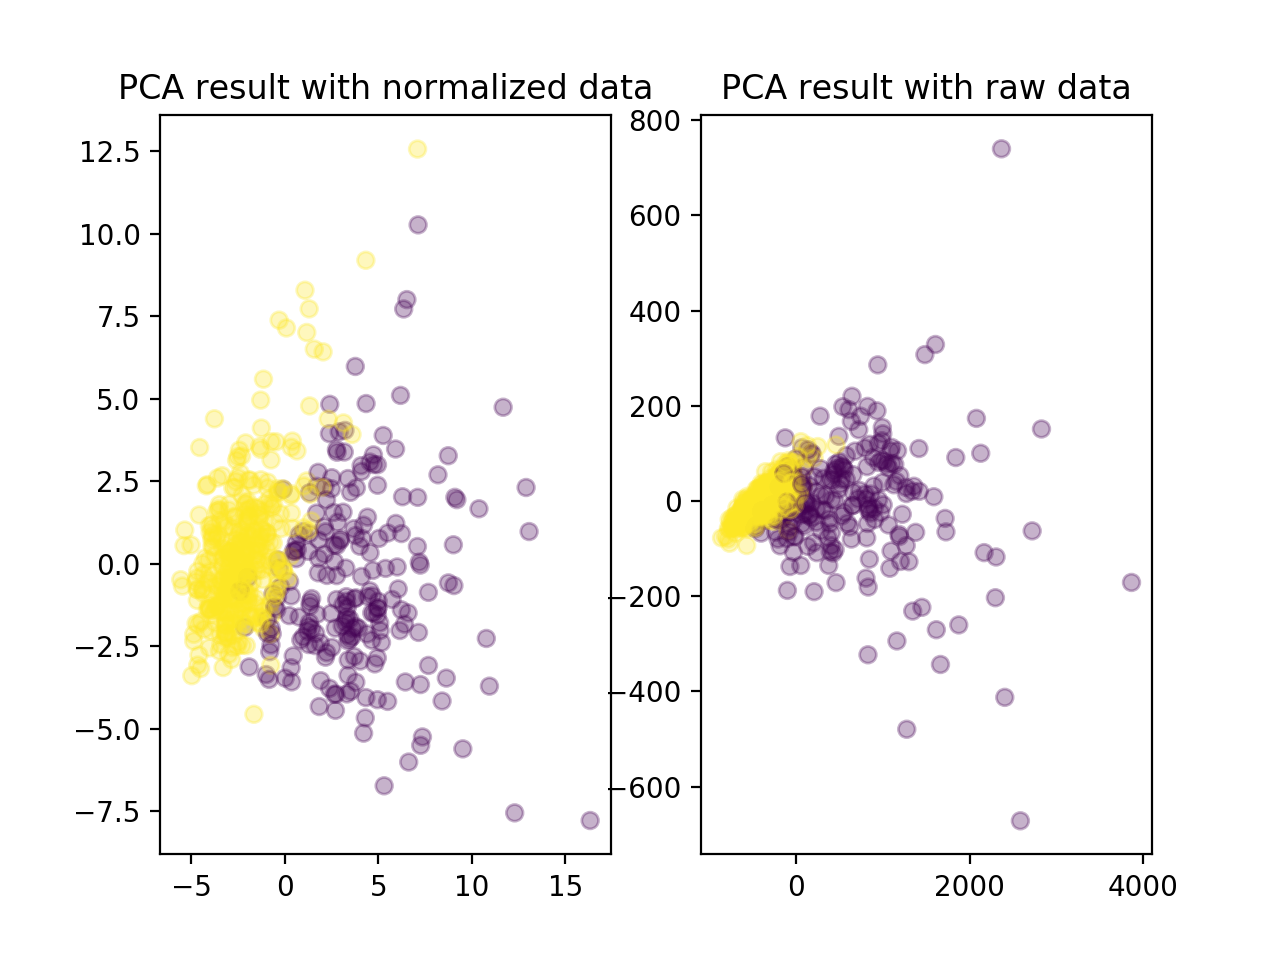

In [126]:
#using normalized data
pca=PCA(n_components=2).fit(X_norm) # 2 components
X_pca_red=pca.transform(X_norm)
print("Features/dimensions reduced from {} to {}".format(X_norm.shape[1],X_pca_red.shape[1]))
#using raw data
pca2=PCA(n_components=2).fit(X) # 2 components
X_pca_red2=pca2.transform(X)
fx,ax=plt.subplots(1,2, )#sharey=True)
axs1,axs2=ax
axs1.scatter(X_pca_red[:,0], X_pca_red[:,1], c=y, alpha=0.3)
axs1.set_title("PCA result with normalized data")
axs2.scatter(X_pca_red2[:,0], X_pca_red2[:,1], c=y, alpha=0.3)
axs2.set_title("PCA result with raw data")
#normalized data is better

In [134]:
pca.components_ #principal axes
pca.explained_variance_ #variance explained by each of the principal components

array([ 13.28160768,   5.69135461])

### Multi Dimensional Scaling (MDS)

In [135]:
# It is a non-linear method of dimensionality reduction, trying to maintain the distance in the low-dimensional form

In [136]:
from sklearn.manifold import MDS

In [137]:
MDS(n_components=2, # number of features to reduce the data to (number of principal components)
   )

MDS(dissimilarity='euclidean', eps=0.001, max_iter=300, metric=True,
  n_components=2, n_init=4, n_jobs=1, random_state=None, verbose=0)

In [143]:
#Using normalized cancer data above
mds_2_dim=MDS(n_components=2).fit_transform(X_norm)

In [141]:
mds_2_dim.shape

(569, 2)

<IPython.core.display.Javascript object>


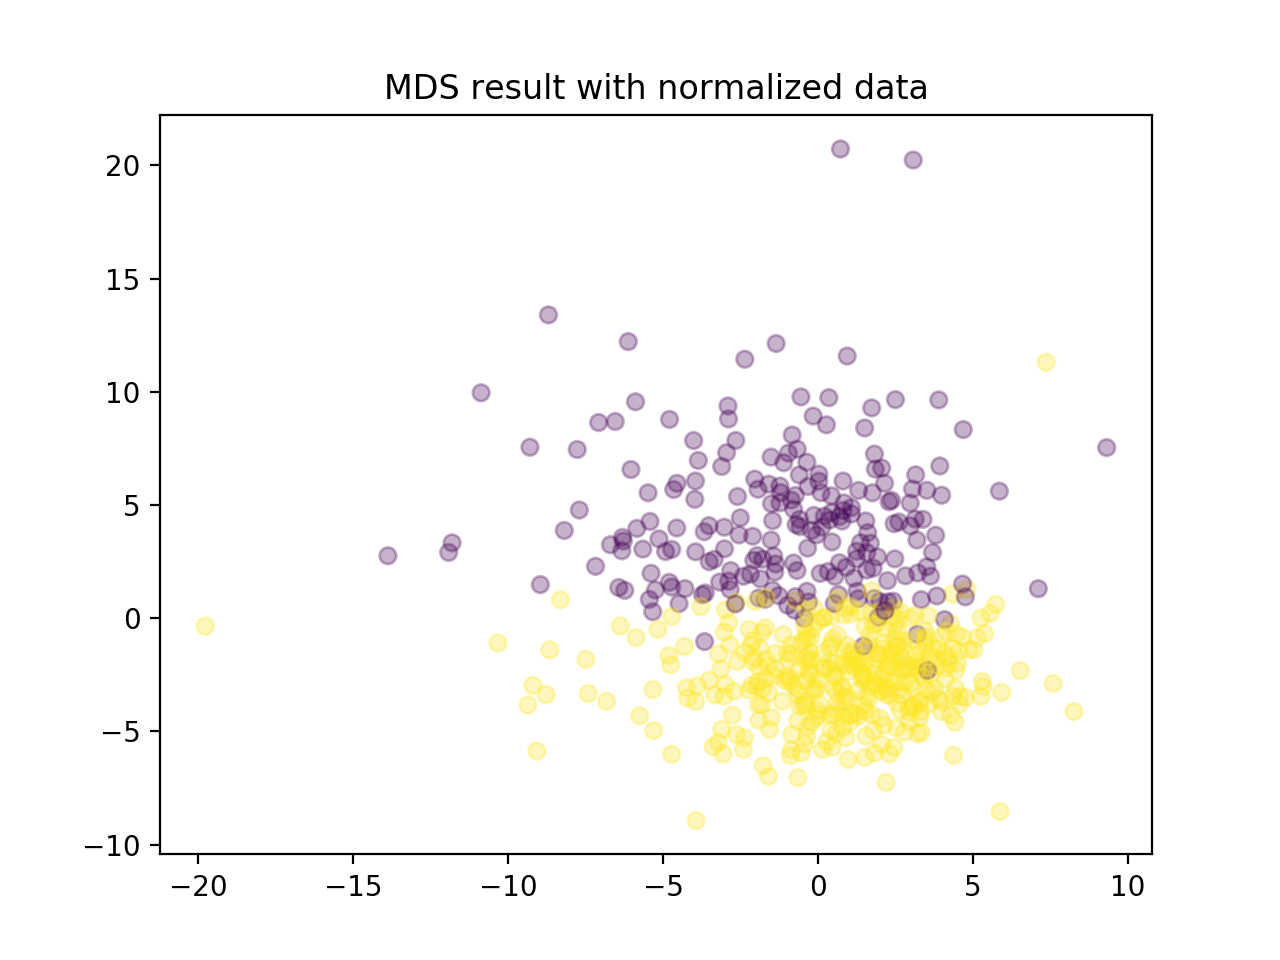

In [144]:
fig=plt.figure()
axs1=plt.gca()
axs1.scatter(mds_2_dim[:,0], mds_2_dim[:,1], c=y, alpha=0.3)
axs1.set_title("MDS result with normalized data")

### t-SNE (t-Distributed Stochastic Neighbor Embedding)

In [145]:
# A manifold learning technique that tries to preserve the distance between neighbors in a low-dimensional 
#representation of data

In [156]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [199]:
digits=datasets.load_digits()
X,y=digits.data, digits.target
X_norm=StandardScaler().fit_transform(X)

In [192]:
X_norm.shape

(901, 64)

In [151]:
TSNE(n_components=2, #number of features to reduce the data to (number of principal components)
     perplexity=30, #is an indication of prriority between local and global patterns in data, typically in [5,50]
     learning_rate=1000,
     random_state=42
    )

TSNE(angle=0.5, early_exaggeration=4.0, init='random', learning_rate=1000,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=30, perplexity=30,
   random_state=42, verbose=0)

In [200]:
tsne_2_dims=TSNE(n_components=2, perplexity=30, learning_rate=500, init="pca", random_state=42).fit_transform(X_norm)

<IPython.core.display.Javascript object>


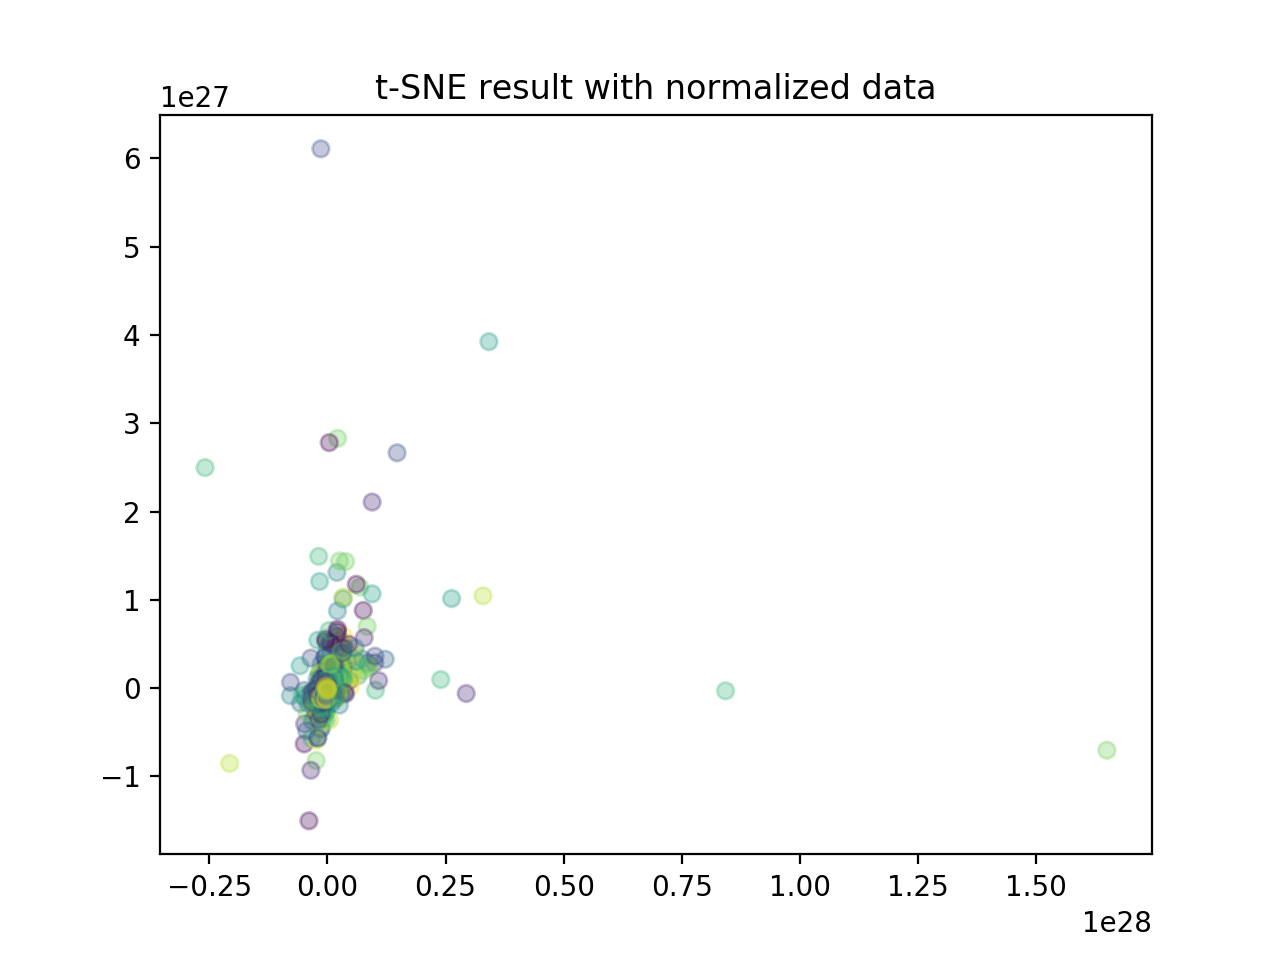

In [201]:
fig=plt.figure()
axs1=plt.gca()
axs1.scatter(tsne_2_dims[:,0], tsne_2_dims[:,1], c=y, alpha=0.3)
axs1.set_title("t-SNE result with normalized data")

### K-means clustering

In [206]:
from sklearn.cluster import KMeans

In [209]:
KMeans(n_clusters=8, #number of clusters
       init="k-means++", #initialize cluster centers "random"ly or by using "k-means++"
       n_init=10, #number of trial to run and choose best one from (using inertia, i.e. sum(dist of points to their center))
    random_state=42
      )

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [303]:
# generate cluster data
X,y=datasets.make_blobs(n_samples=10000,
                       n_features=20,
                       centers=5,
                        cluster_std=10, # noisy clusters
                       random_state=42)
X_norm=StandardScaler().fit_transform(X) #required for K-means

In [304]:
kmc=KMeans(n_clusters=5, init="k-means++").fit(X_norm) #transform method is not necessay
res=kmc.transform(X_norm) #returns the distance of each point to each cluster center
# KMeans(n_clusters=5).fit_predict(X_norm) computes the predicting cluster assignment for each sample

In [305]:
kmc.labels_, #cluster labels for each sample
kmc.cluster_centers_; #cluster centers

In [306]:
X_red=PCA(n_components=2).fit_transform(X_norm)

<IPython.core.display.Javascript object>


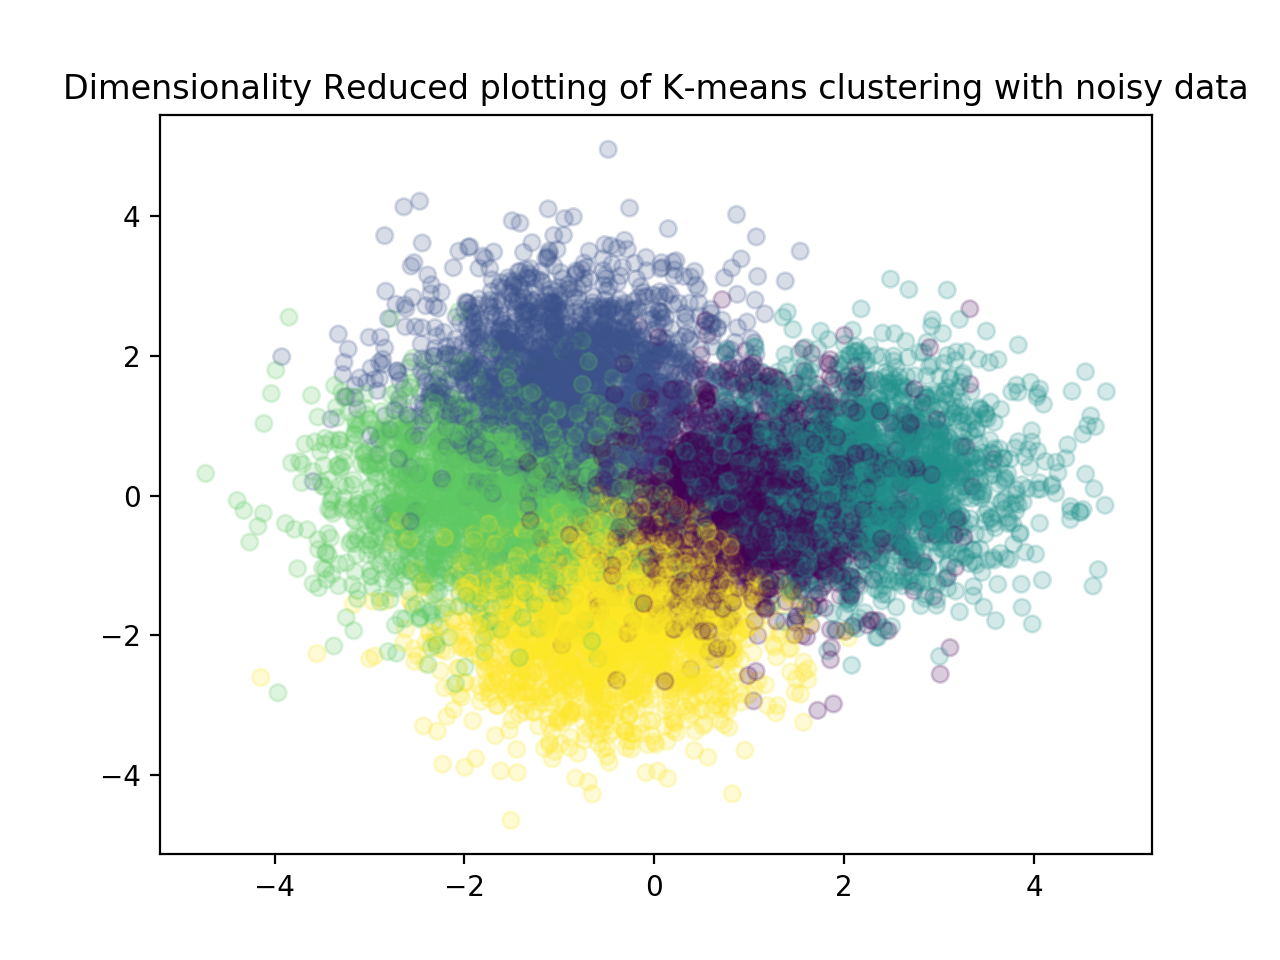

In [308]:
f=plt.figure()
axs=plt.gca()
axs.scatter(X_red[:,0], X_red[:,1], c=kmc.labels_, alpha=0.2)
axs.set_title("Dimensionality Reduced plotting of K-means clustering with noisy data")
plt.show()

### Agglomerative Clustering

In [309]:
# iterative, bottom-up clustering method

In [310]:
from sklearn.cluster import AgglomerativeClustering

In [311]:
AgglomerativeClustering(n_clusters=2,
                       linkage="ward", #cluster similarity criterion to minimized-> {"ward", "average", "max"}
#Linkage is like a cost function, "ward" merges min variance clusters, "average" min average cluster distances,
# "max" min max distance between clusters
                        affinity="euclidean", #distance metric for linkage like {"euclidean", "l1", "l2", "manhattan"}
                       )

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward',
            memory=Memory(cachedir=None), n_clusters=2,
            pooling_func=<function mean at 0x10f1df268>)

In [312]:
#using the normalized data above
agc=AgglomerativeClustering(n_clusters=5, linkage="ward").fit(X_norm)
labels=agc.labels_
#or
labels2=AgglomerativeClustering(n_clusters=5, linkage="ward").fit_predict(X_norm)
np.all(labels==labels2)

True

<IPython.core.display.Javascript object>


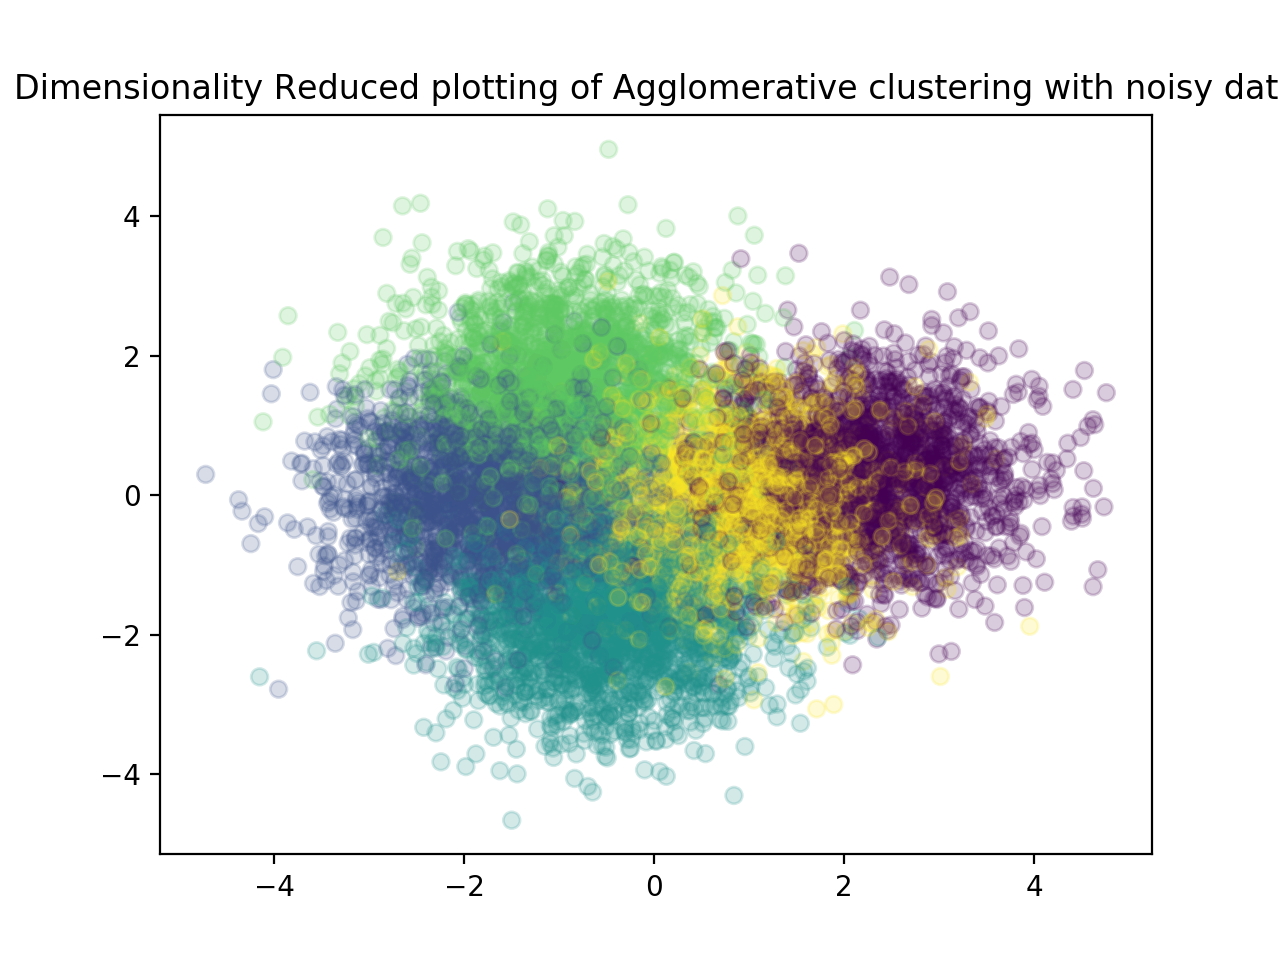

In [314]:
f=plt.figure()
axs=plt.gca()
X_red=PCA(n_components=2).fit_transform(X_norm)
axs.scatter(X_red[:,0], X_red[:, 1], c=y, alpha=0.2)
axs.set_title("Dimensionality Reduced plotting of Agglomerative clustering with noisy data")
plt.show()

### DBSCAN clustering (Density Based Spacial Clustering of Applications with Noise)

In [316]:
from sklearn.cluster import DBSCAN

In [388]:
DBSCAN(eps=0.5, #maximum distance between neighbors to be considered as part of the same neighborhood 
# i.e. (size of circle of influence)
      min_samples=5, #minimum number of samples in a sample's ciricle of influence to be considered a core sample
      )
#min_samples and eps implicity control the number of clusters
# Algorithm for clustering of complex data, which requires cluster center specification and labels noisy data

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    min_samples=5, n_jobs=1, p=None)

In [383]:
# using the previous normailized data
dbs_preds=DBSCAN(eps=4, min_samples=10).fit_predict(X_norm)
# predicted value of -1 means noise

<IPython.core.display.Javascript object>


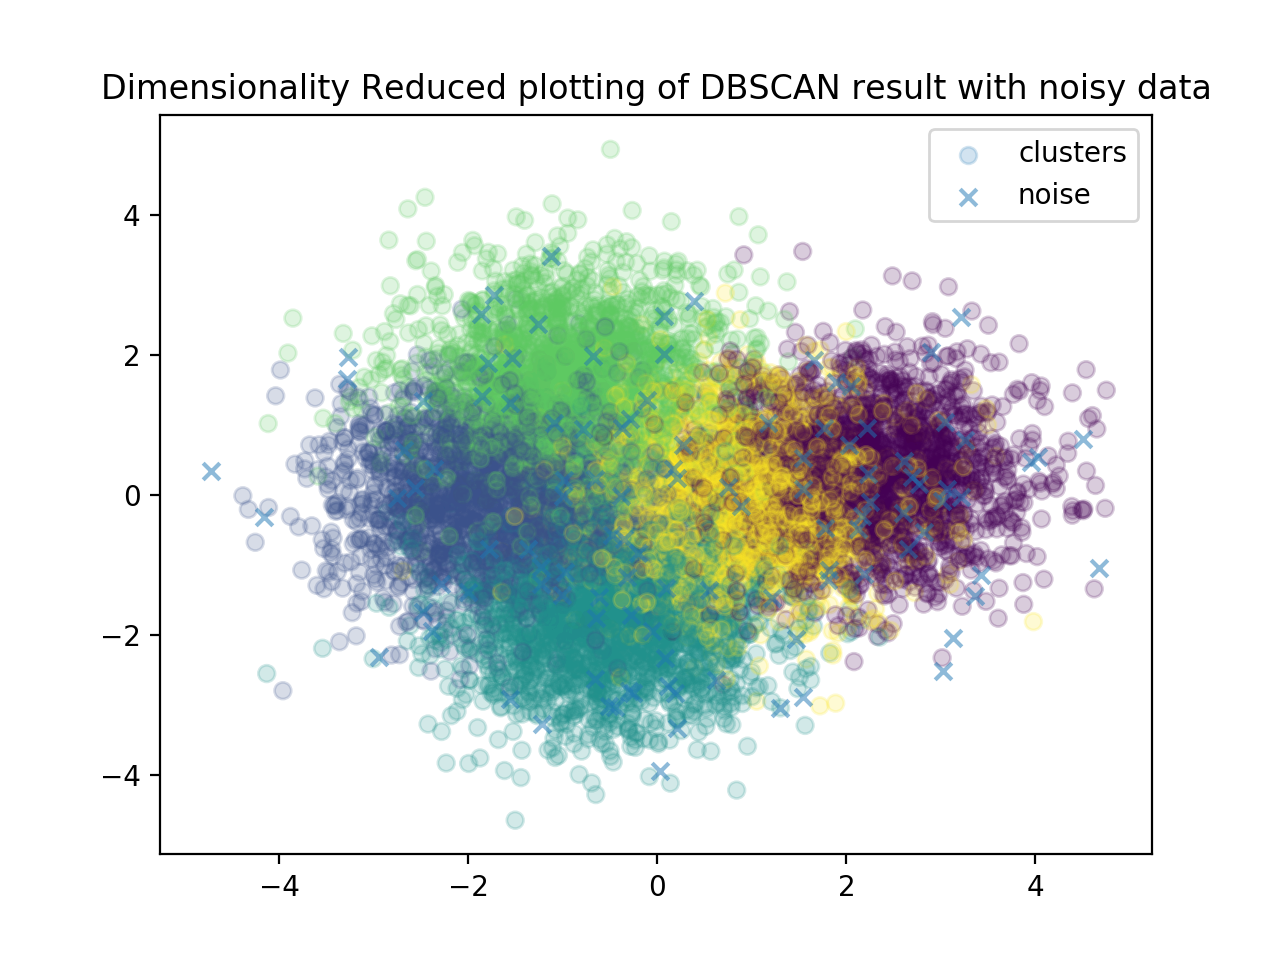

In [384]:
f=plt.figure()
axs=plt.gca()
X_red=PCA(n_components=2).fit_transform(X_norm)
idx=dbs_preds!=-1
noise_idx=dbs_preds==-1
A,B=X_red[:,0][idx], X_red[:,1][idx]
An,Bn=X_red[:,0][noise_idx], X_red[:,1][noise_idx]
axs.scatter(A,B, c=y[idx], alpha=0.2, label="clusters")
axs.scatter(An,Bn,marker='x', alpha=0.5, label="noise")
axs.set_title("Dimensionality Reduced plotting of DBSCAN result with noisy data")
axs.legend()
plt.show()

In [385]:
np.bincount(np.where(dbs_preds==-1, 1,2))

array([   0,  111, 9889])